### Importing data from sources to an appropriate format

In [96]:
import pyspark
import numpy as np
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
from pyspark.sql.functions import *
import pandas as pd
demography_data= pd.read_excel("Demography_USA.xlsx")
pharmacy_data = pd.concat(pd.read_excel("Community Pharmacy Data.xlsx", sheet_name=None), ignore_index=True)

### Handling Null values in State Column

In [97]:
pharmacy_data['State'] = pharmacy_data['State'].fillna('')
pharmacy_data["State"]=pharmacy_data["State"].replace('',method='ffill')

In [98]:
pharmacy_data.head()

,State,Pharmacy Name,Street Address 1 (physical store address),Street Address 2,City,Zip,Borough,County,Notes,Registration #,Unnamed: 9,Key:,COUNTRY_NAME,Unnamed: 7,County (CODE)
0,Alaska,ANCHORAGE PIONEER'S HOME PHARMACY,923 W 11TH AVENUE,NaN,ANCHORAGE,99501,Anchorage Borough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,CARRS PHARMACY #1802,"1340 Gambell St, Anchorage",NaN,ANCHORAGE,99501,Anchorage Borough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,DEPARTMENT OF CORRECTIONS PHARMACY,"550 W 7TH AVE., ST 1260",NaN,ANCHORAGE,99501,Anchorage Borough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alaska,CARRS PHARMACY #1812,"4000 W Dimond Blvd,",NaN,ANCHORAGE,99502,Anchorage Borough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alaska,ST ELIAS SPECIALTY HOSPITAL,4800 CORDOVA,NaN,ANCHORAGE,99503,Anchorage Borough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
#females demographics in each state
# demography_data.groupby("STATE_NAME").sum("FEMALES")

,OBJECTID,Prevalence of obesity,Asthma,Hypertension,Diabetes,CVD,COPD,Kidney disease,Cancer,HIV/AIDS,...,AVE_SIZE12,CROP_ACR12,AVE_SALE12,SQMI,Shape__Area,Shape__Length,IECC Climate Zone,Temp,cvd_100k,hypertension_100k
STATE_NAME,,,,,,,,,,,,,,,,,,,,,
Alabama,125296,1289152,0.0,4528.017348,518055,14255.797999,0.0,0.0,0.0,5957,...,15950,2758521,7544250,51649.03,12.880058,159.836391,199,51649.529757,21265.4,6541.1
Alaska,87383,173714,0.0,-2772.000000,42339,-2772.000000,0.0,0.0,0.0,-2772,...,-1598,80704,381591,563399.54,271.499143,1132.866798,204,564186.733187,-2772.0,-2772.0
Arizona,45204,1403048,0.0,7759.847081,491715,12078.295895,0.0,0.0,0.0,2237,...,22353,1150811,5587870,113997.75,28.921311,106.906364,48,113998.426668,2970.5,1752.2
Arkansas,147050,753725,0.0,4440.228120,295040,8449.219931,0.0,0.0,0.0,3250,...,29390,7931111,20318737,53178.75,13.585568,176.787375,237,53179.003135,22641.9,9599.4
California,159518,6895800,0.0,48556.268040,2494282,75323.816464,0.0,0.0,0.0,6067,...,26490,9591783,27735863,158144.83,41.639274,269.313392,201,158144.605316,11560.5,7291.2
Colorado,148890,901482,0.0,2517.870994,261865,8289.404993,0.0,0.0,0.0,2586,...,64651,10649747,11110875,104093.90,28.039455,202.263071,356,104093.334785,9236.5,2144.5
Connecticut,17666,703573,0.0,2641.389597,244276,6666.186881,0.0,0.0,0.0,1110,...,601,151144,753053,4962.77,1.388655,25.205054,40,4962.707520,1502.4,583.0
Delaware,6395,223380,0.0,834.262258,83259,1993.946244,0.0,0.0,0.0,1011,...,596,439157,1281529,1975.77,0.532073,10.688889,12,1975.766690,670.3,308.9
District of Columbia,116,127442,0.0,1091.058930,43748,1601.463136,0.0,0.0,0.0,-99,...,-99,-99,-99,62.19,0.016727,0.956287,4,62.186897,257.6,175.5


In [201]:
# pharmacy_data aggregagete by State
pharmacy_data = pharmacy_data.iloc[1: , :]
pharmacy_data.groupby("State").count()

,Pharmacy Name,Street Address 1 (physical store address),Street Address 2,City,Zip,Borough,County,Notes,Registration #,Unnamed: 9,Key:,COUNTRY_NAME,Unnamed: 7,County (CODE)
State,,,,,,,,,,,,,,
\n,1,1,1,1,1,0,0,0,0,0,0,0,0,0
Alaska,125,125,0,125,125,125,0,0,0,0,0,0,0,0
Arkansas,750,750,0,750,750,0,0,0,0,0,0,0,0,750
COLARADO,983,982,26,983,983,0,0,0,0,0,0,0,0,0
COLARADO (in mt. sheet),983,982,26,983,983,0,0,0,0,0,0,0,0,0
California,13067,13067,217,13067,13067,6534,6533,0,0,0,0,0,0,0
Connecticut,687,687,0,687,687,0,0,0,0,0,0,0,0,0
HAWAII,203,203,202,203,203,0,0,0,0,0,0,0,0,0
Hawaii,202,202,201,202,202,0,0,0,0,0,0,0,0,0


# Let's know the data

It is important for us to know the data of our data.

In [101]:
demography_data.describe()

,OBJECTID,Prevalence of obesity,Asthma,Hypertension,Diabetes,CVD,COPD,Kidney disease,Cancer,HIV/AIDS,...,AVE_SIZE12,CROP_ACR12,AVE_SALE12,SQMI,Shape__Area,Shape__Length,IECC Climate Zone,Temp,cvd_100k,hypertension_100k
count,3219.000000,3.219000e+03,0.0,3219.000000,3219.000000,3219.000000,0.0,0.0,0.0,3219.000000,...,3219.000000,3.219000e+03,3.219000e+03,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000
mean,1610.000000,2.172778e+04,NaN,100.495064,7829.286424,207.510954,NaN,NaN,NaN,48.931034,...,588.155638,1.210170e+05,1.885318e+05,1111.776089,0.339017,2.885193,4.200683,1112.014950,225.012333,98.639422
std,929.389585,6.093662e+04,NaN,385.271229,21997.523637,660.812847,NaN,NaN,NaN,159.133869,...,1407.695579,1.479206e+05,2.901722e+05,3617.057863,1.778273,4.827836,1.382699,3617.034773,100.703679,89.708289
min,1.000000,-9.900000e+01,NaN,-99.000000,-99.000000,-99.000000,NaN,NaN,NaN,-99.000000,...,-99.000000,-9.900000e+01,-9.900000e+01,1.990000,0.000535,0.117034,1.000000,1.988348,-99.000000,-99.000000
25%,805.500000,2.540500e+03,NaN,10.696634,1001.500000,25.104980,NaN,NaN,NaN,0.000000,...,144.000000,1.966600e+04,3.771500e+04,426.835000,0.114209,1.640402,3.000000,426.834109,197.100000,74.000000
50%,1610.000000,6.378000e+03,NaN,29.517048,2586.000000,63.884324,NaN,NaN,NaN,19.000000,...,243.000000,6.322500e+04,1.087760e+05,617.930000,0.164612,2.018205,4.000000,617.934088,233.900000,107.700000
75%,2414.500000,1.665650e+04,NaN,79.501743,6222.000000,158.098639,NaN,NaN,NaN,65.000000,...,485.000000,1.786310e+05,2.432685e+05,932.415000,0.245890,2.739730,5.000000,932.425464,277.400000,146.000000
max,3219.000000,1.653819e+06,NaN,11377.121675,639139.000000,20036.430500,NaN,NaN,NaN,999.000000,...,37952.000000,1.260269e+06,5.400414e+06,147811.160000,74.223842,112.596940,8.000000,147800.736788,632.000000,557.100000


In [102]:
demography_data.shape


(3219, 73)

#### Checking for Columns with Null values

In [103]:
demography_data[demography_data.columns[demography_data.isnull().any()]].isnull().sum()

Asthma                  3219
COPD                    3219
Kidney disease          3219
Cancer                  3219
IECC Moisture Regime     130
dtype: int64

Since `Asthma`, `COPD`, `Kidney disease` and `Cancer` columns have all null values, it is better to drop these columns.

#### Dropping null valued Columns

In [104]:
demography_df = demography_data.drop(['Asthma', 'COPD', 'Kidney disease', 'Cancer'], axis=1)
print("Final columns of demography_df: ", demography_df.columns)
#demography_df[demography_df.columns[demography_df.isnull().any()]].isnull().sum()

Final columns of demography_df:  Index(['OBJECTID', 'NAME', 'STATE_NAME', 'Prevalence of obesity',
       'Hypertension', 'Diabetes', 'CVD', 'HIV/AIDS', 'STATE_FIPS',
       'CNTY_FIPS', 'FIPS', 'POP2010', 'POP10_SQMI', 'POP2013', 'POP13_SQMI',
       'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN', 'HAWN_PI', 'HISPANIC', 'OTHER',
       'MULT_RACE', 'MALES', 'FEMALES', 'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14',
       'AGE_15_19', 'AGE_20_24', 'AGE_25_34', 'AGE_35_44', 'AGE_45_54',
       'AGE_55_64', 'AGE_65_74', 'AGE_75_84', 'AGE_85_UP', 'MED_AGE',
       'MED_AGE_M', 'MED_AGE_F', 'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M',
       'HSEHLD_1_F', 'MARHH_CHD', 'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD',
       'FAMILIES', 'AVE_FAM_SZ', 'HSE_UNITS', 'VACANT', 'OWNER_OCC',
       'RENTER_OCC', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'AVE_SALE12',
       'SQMI', 'Shape__Area', 'Shape__Length', 'State', 'IECC Climate Zone',
       'IECC Moisture Regime', 'BA Climate Zone', 'County Name', 'Temp',
       'cvd_1

### State-wise Asian and Hispanic Population Graph

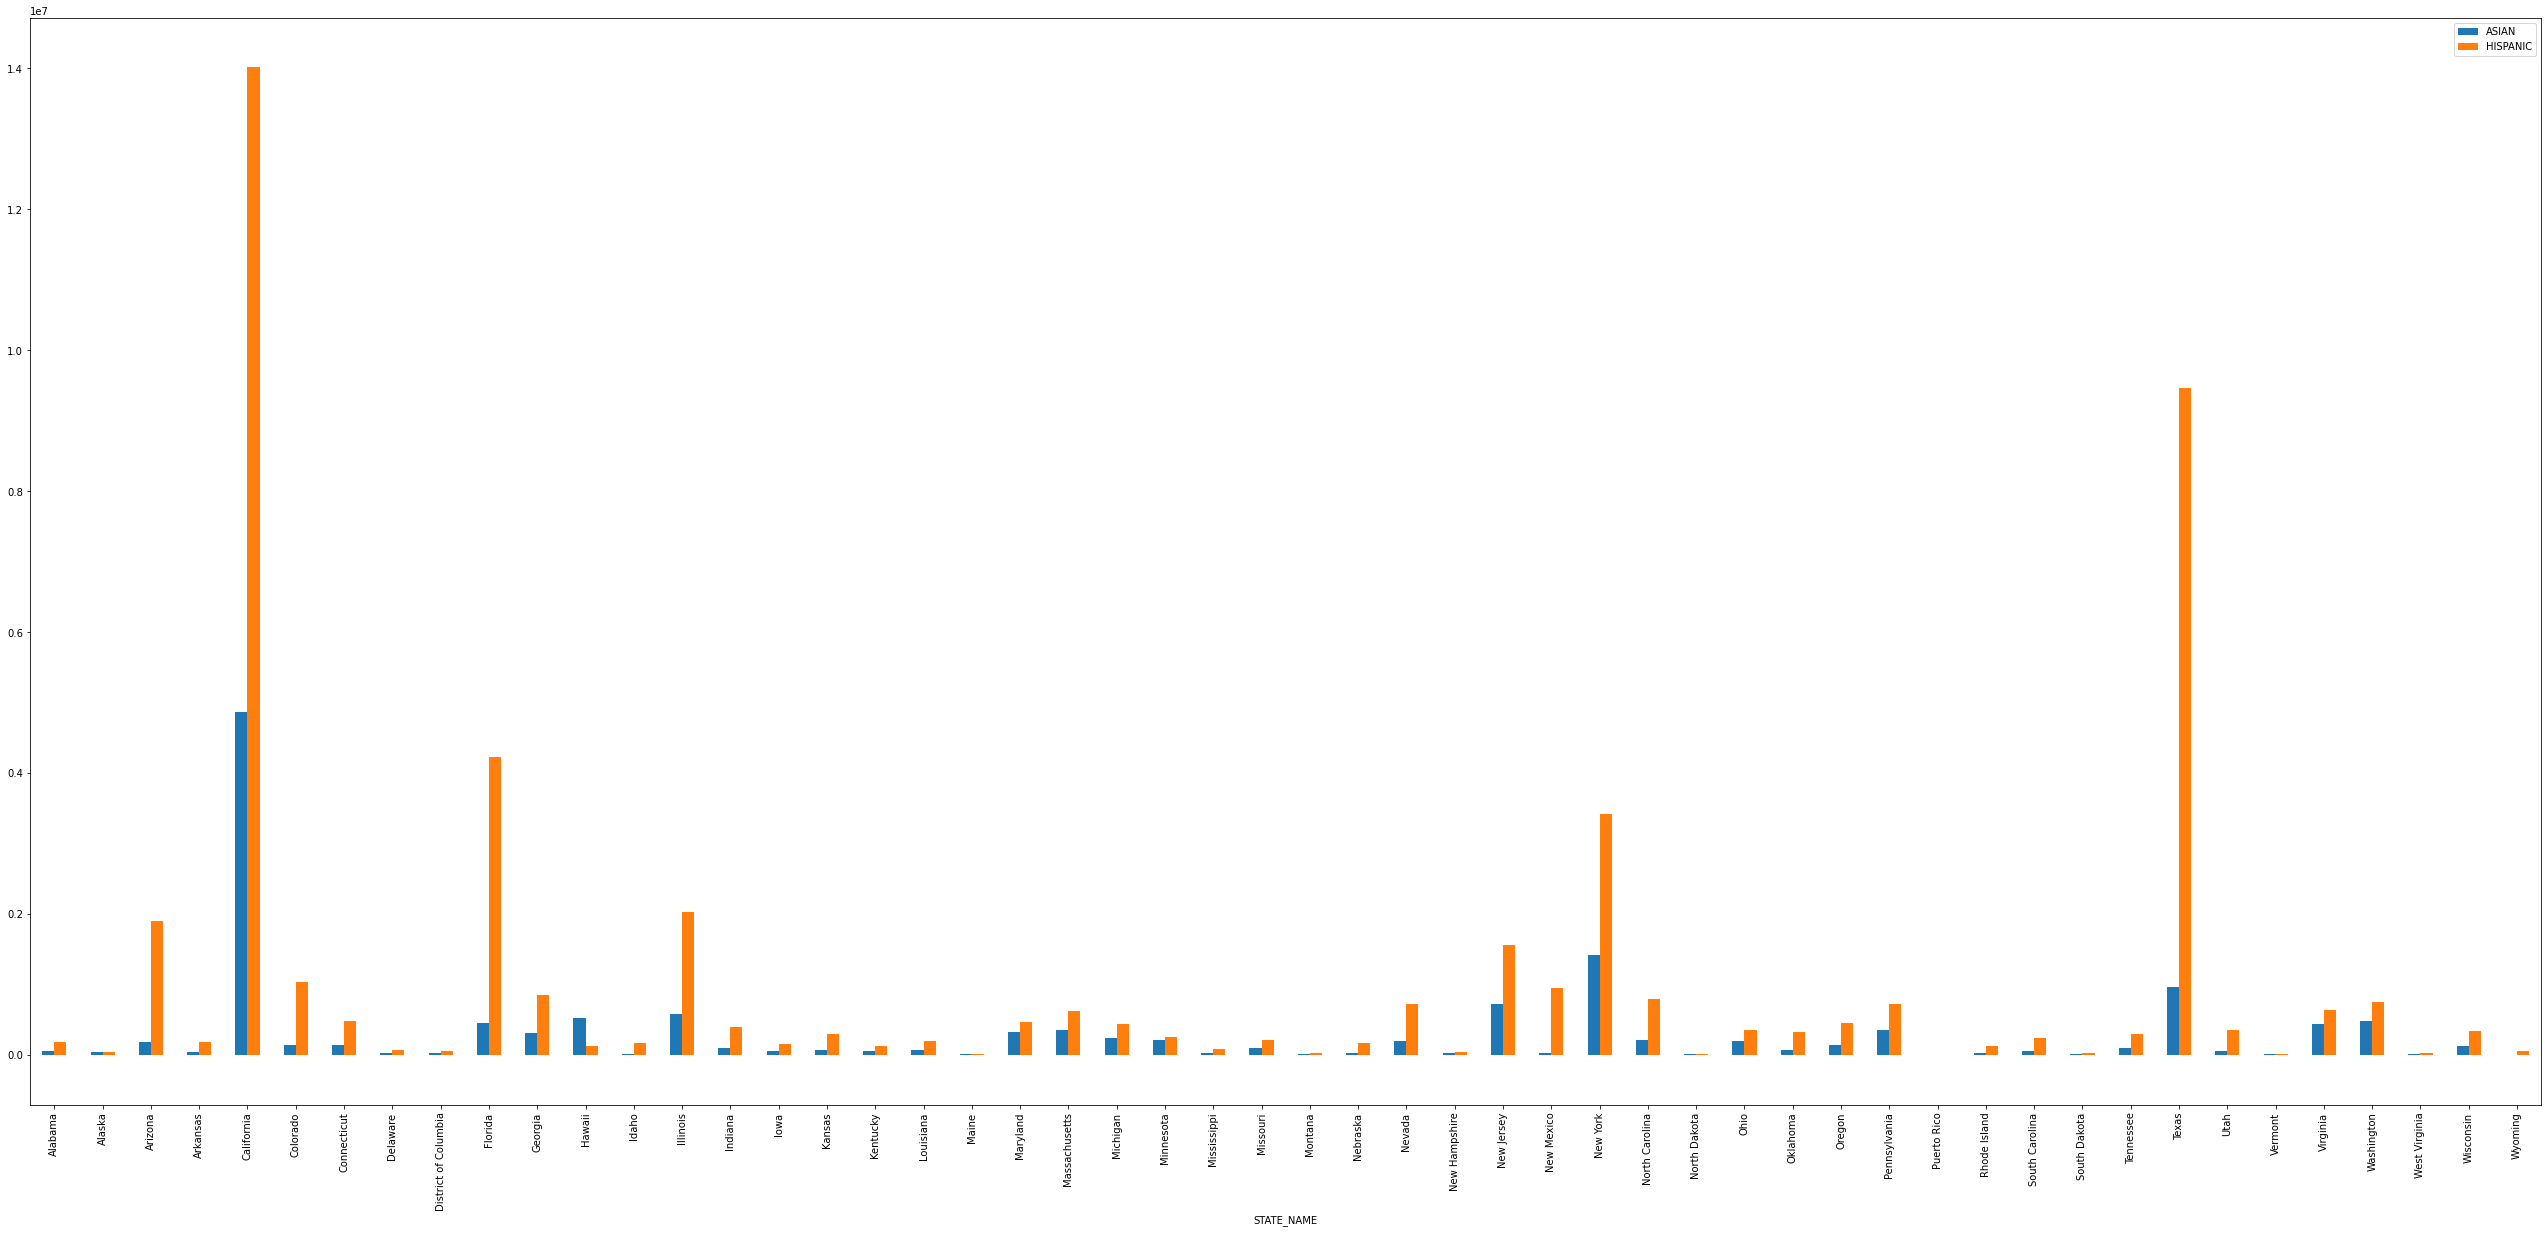

In [105]:
table1 = pd.pivot_table(demography_df,index=['STATE_NAME'],values=['ASIAN','HISPANIC'],aggfunc=np.sum)
table1.plot(kind='bar',figsize=(45, 20));

### From the below graph we can infer that the States of California, Texas, Florida and New York seem to be having a major share of the minorities population

### Analysing the trend of HIV/AIDS based on State

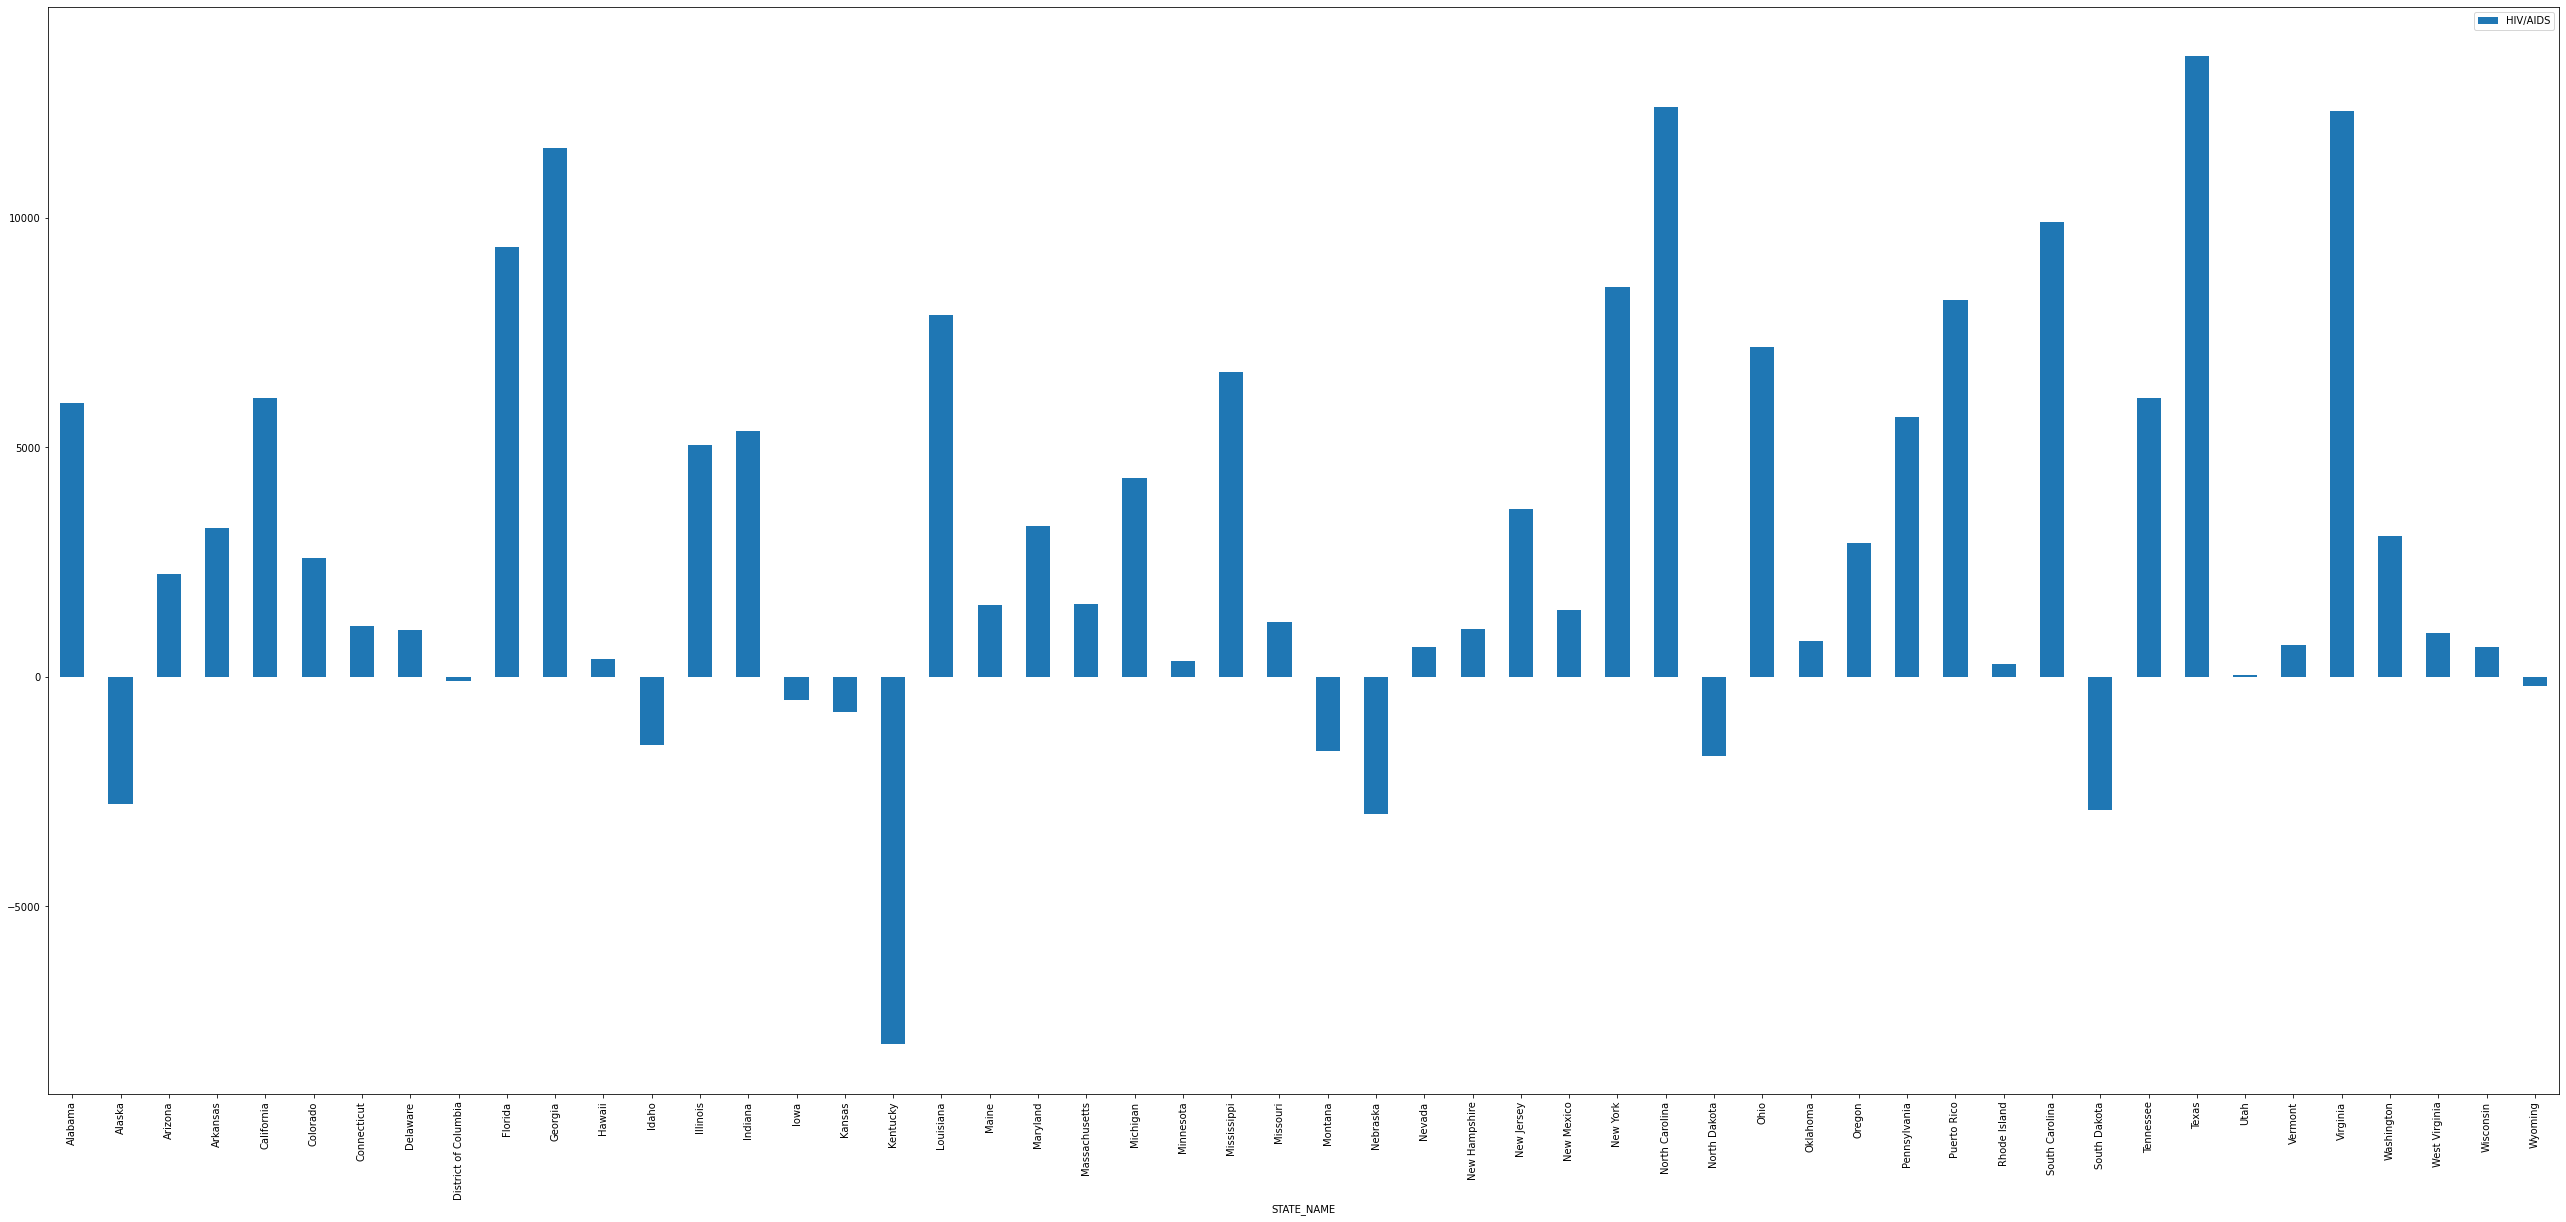

In [106]:
# demography_df.groupby('STATE_NAME')['HIV/AIDS'].sum()[]
import numpy as np
table = pd.pivot_table(demography_df,index=['STATE_NAME'],values=['HIV/AIDS'],aggfunc=np.sum)
table.plot(kind='bar',figsize=(45, 20));

### From the above HIV/AIDS graph, we can observe that there are quite a few records with -99 value for HIV/AIDS. Checking for the same trend in other columns of interest (Obesity,Diabetes,Hiv/Aids,Hyptertension), so that these errors in the data can be handled.

In [107]:
# demography_df['Prevalence of obesity'].sort_values().value_counts()
demography_df.sort_values(by=['Prevalence of obesity'], ascending=True)['Prevalence of obesity'].value_counts()

-99         79
 315         3
 4132        3
 2680        3
 4194        3
            ..
 4596        1
 4597        1
 4607        1
 4614        1
 1653819     1
Name: Prevalence of obesity, Length: 2933, dtype: int64

In [108]:
demography_df['HIV/AIDS'].sort_values().value_counts()

-99     733
 0      185
 6       74
 5       73
 9       59
       ... 
 357      1
 358      1
 362      1
 364      1
 999      1
Name: HIV/AIDS, Length: 420, dtype: int64

In [109]:
demography_df['Hypertension'].sort_values().value_counts()

-99.000000       391
 26.391456         2
 66.556192         1
 65.198526         1
 65.273264         1
                ... 
 22.304944         1
 22.319205         1
 22.334556         1
 22.379375         1
 11377.121675      1
Name: Hypertension, Length: 2828, dtype: int64

In [110]:
# demography_df['Diabetes'].sort_values().value_counts()
# demography_df.sort_values(by=['Diabetes'], ascending=True)['Diabetes'].value_counts()
demography_df['Diabetes'].sort_values().value_counts().sort_index()

-99        3
 13        1
 17        1
 19        1
 20        1
          ..
 203348    1
 273499    1
 324450    1
 373516    1
 639139    1
Name: Diabetes, Length: 2684, dtype: int64

In [111]:
demography_df['Hypertension'].sort_values().value_counts().sort_index()

-99.000000       391
 2.356798          1
 2.604402          1
 2.735218          1
 2.854731          1
                ... 
 4211.651824       1
 4807.736340       1
 5163.846024       1
 6385.666549       1
 11377.121675      1
Name: Hypertension, Length: 2828, dtype: int64

In [112]:
cols = ['Prevalence of obesity', 'HIV/AIDS', 'Hypertension', 'Diabetes']
demography_df[cols] = demography_df[cols].applymap(np.int64)

In [113]:
demography_df[cols]

,Prevalence of obesity,HIV/AIDS,Hypertension,Diabetes
0,6364,10,13,2813
1,4779,34,19,2188
2,3803,15,10,2003
3,13652,119,60,5806
4,12938,64,35,6099
...,...,...,...,...
3214,2233,0,-99,686
3215,3553,8,7,875
3216,9317,17,47,2757
3217,5668,6,20,2070


### Handling the errors by replacing the values with median of the respective column

In [114]:
demography_df['Prevalence of obesity'] = demography_df['Prevalence of obesity'].replace(-99, demography_df['Prevalence of obesity'].median())
demography_df['Prevalence of obesity'].sort_values().value_counts().sort_index()

16         1
19         1
46         1
70         1
100        1
          ..
549462     1
830450     1
902489     1
1103737    1
1653819    1
Name: Prevalence of obesity, Length: 2932, dtype: int64

In [115]:
demography_df['HIV/AIDS'] = demography_df['HIV/AIDS'].replace(-99, demography_df['HIV/AIDS'].median())
demography_df['HIV/AIDS'].sort_values().value_counts().sort_index()

0      185
5       73
6       74
7       48
8       51
      ... 
983      1
984      1
987      1
992      1
999      1
Name: HIV/AIDS, Length: 419, dtype: int64

In [116]:
demography_df['Hypertension'] = demography_df['Hypertension'].replace(-99, demography_df['Hypertension'].median())
demography_df['Hypertension'].sort_values().value_counts().sort_index()

2         6
3        21
4        35
5        50
6        69
         ..
4211      1
4807      1
5163      1
6385      1
11377     1
Name: Hypertension, Length: 462, dtype: int64

In [117]:
demography_df['Diabetes'] = demography_df['Diabetes'].replace(-99, demography_df['Diabetes'].median())
demography_df['Diabetes'].sort_values().value_counts().sort_index()

13        1
17        1
19        1
20        1
23        1
         ..
203348    1
273499    1
324450    1
373516    1
639139    1
Name: Diabetes, Length: 2683, dtype: int64

In [118]:
demography_df.head()

,OBJECTID,NAME,STATE_NAME,Prevalence of obesity,Hypertension,Diabetes,CVD,HIV/AIDS,STATE_FIPS,CNTY_FIPS,...,Shape__Area,Shape__Length,State,IECC Climate Zone,IECC Moisture Regime,BA Climate Zone,County Name,Temp,cvd_100k,hypertension_100k
0,651,Randolph,Alabama,6364,13,2813,91.321650,10,1,111,...,0.146462,1.585845,AL,3,A,Mixed-Humid,Randolph,584.171953,397.5,59.5
1,791,Henry,Alabama,4779,19,2188,46.808250,34,1,67,...,0.139761,1.637258,AL,3,A,Hot-Humid,Henry,568.329522,269.4,112.2
2,808,Lamar,Alabama,3803,10,2003,49.038750,15,1,75,...,0.152635,1.640691,AL,3,A,Mixed-Humid,Lamar,605.448613,337.5,71.5
3,846,Dale,Alabama,13652,60,5806,148.505994,119,1,45,...,0.138260,1.651520,AL,3,A,Hot-Humid,Dale,562.710822,296.1,120.2
4,912,Coffee,Alabama,12938,35,6099,145.481716,64,1,31,...,0.167143,1.679895,AL,3,A,Hot-Humid,Coffee,680.472859,283.9,68.4


### State-wise analysis of Columns of interest

In [119]:
import numpy as np

req_cols = ['STATE_NAME', "Prevalence of obesity", 'Hypertension', 'Diabetes', 'HIV/AIDS']
req_data = demography_df[req_cols]
# req_state_data


# hiv = pd.pivot_table(demography_df,index=['STATE_NAME'],columns=['HIV/AIDS', 'Diabetes'], values=['HIV/AIDS'],aggfunc=np.sum)
# hiv.plot(kind='bar',figsize=(45, 20));

In [120]:
r = req_data.groupby('STATE_NAME').sum()
r

,Prevalence of obesity,Hypertension,Diabetes,HIV/AIDS
STATE_NAME,,,,
Alabama,1289152,4493,518055,6311
Alaska,173714,812,42339,532
Arizona,1403048,7752,491715,2473
Arkansas,753725,4661,295040,3604
California,6895800,48785,2494282,8309
Colorado,901482,5054,261865,4356
Connecticut,703573,2637,244276,1464
Delaware,223380,833,83259,1129
District of Columbia,127442,1091,43748,19


In [121]:
r= r.reset_index()
# r

<AxesSubplot:xlabel='STATE_NAME'>

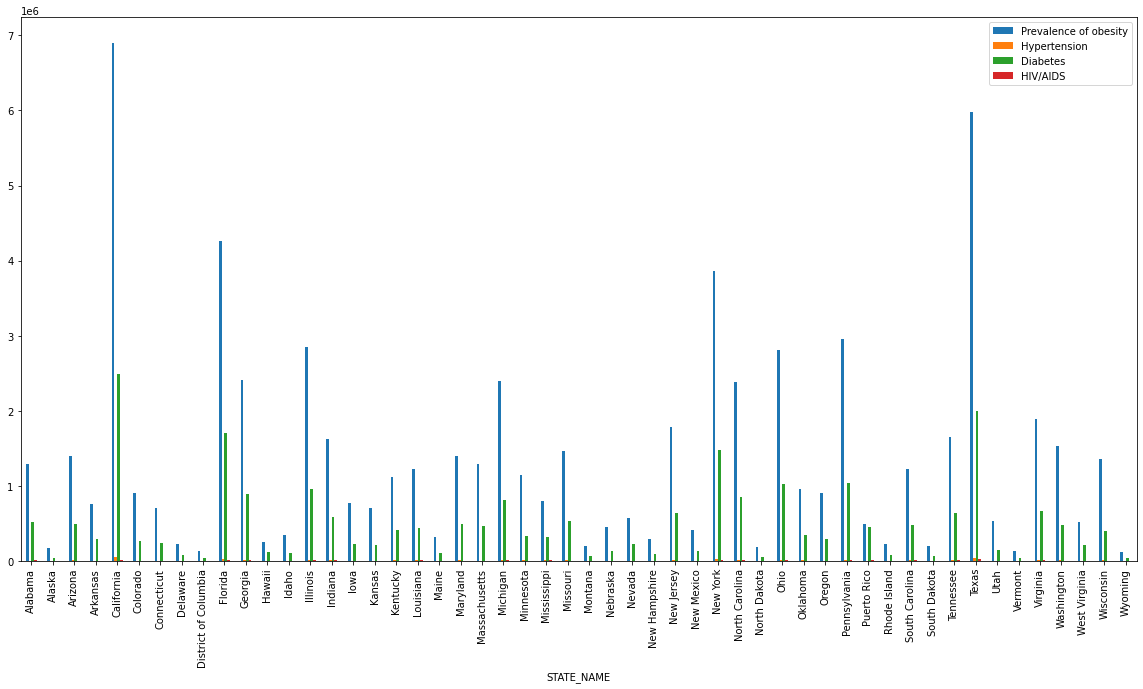

In [122]:
r.plot(x="STATE_NAME", y=["Prevalence of obesity", 'Hypertension', 'Diabetes', 'HIV/AIDS'], kind="bar", figsize=(20,10))

### From the above plot, we can observe that a few states like California and Texas have the most cases of Obesity and Diabetes. But, the other columns like HIV/AIDS not being as prevalent aren't showing up in an overall plot. To facilitate a view of such columns, we created a plot showing state-wise trend for each of the columns

Text(0, 0.5, 'Prevalence of obesity(in Million)')

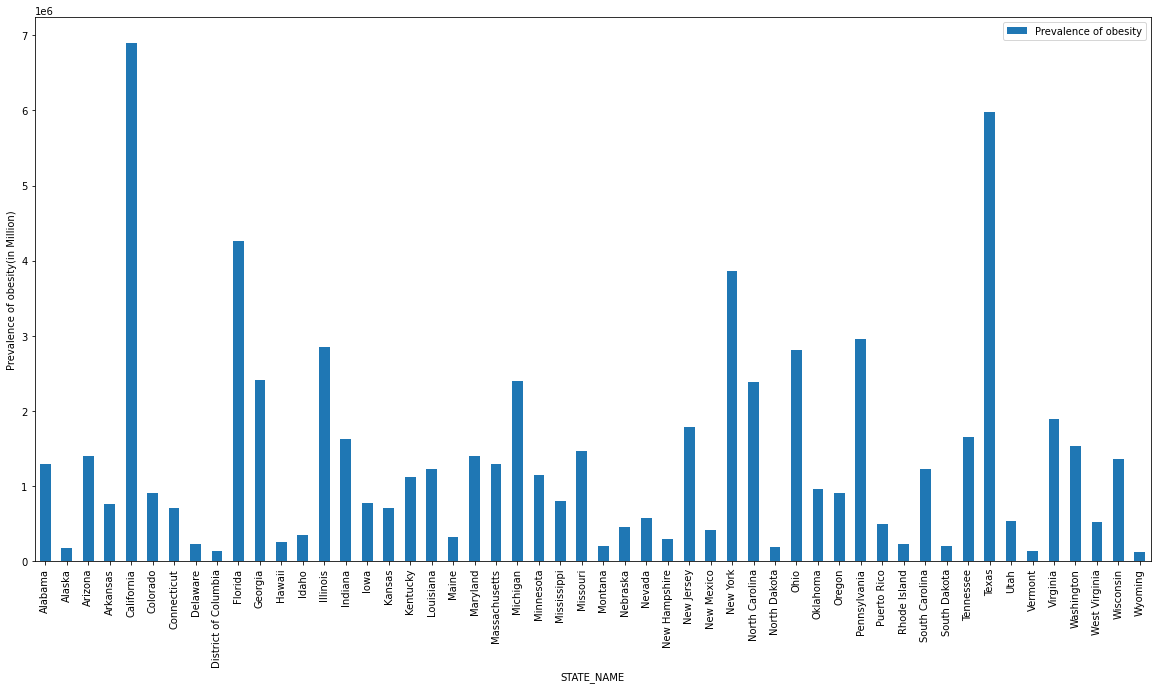

In [123]:
ax = r.plot(x="STATE_NAME", y=["Prevalence of obesity"], kind="bar", figsize=(20,10))
ax.set_xlabel("STATE_NAME")
ax.set_ylabel("Prevalence of obesity(in Million)")

Text(0, 0.5, 'HIV/AIDS')

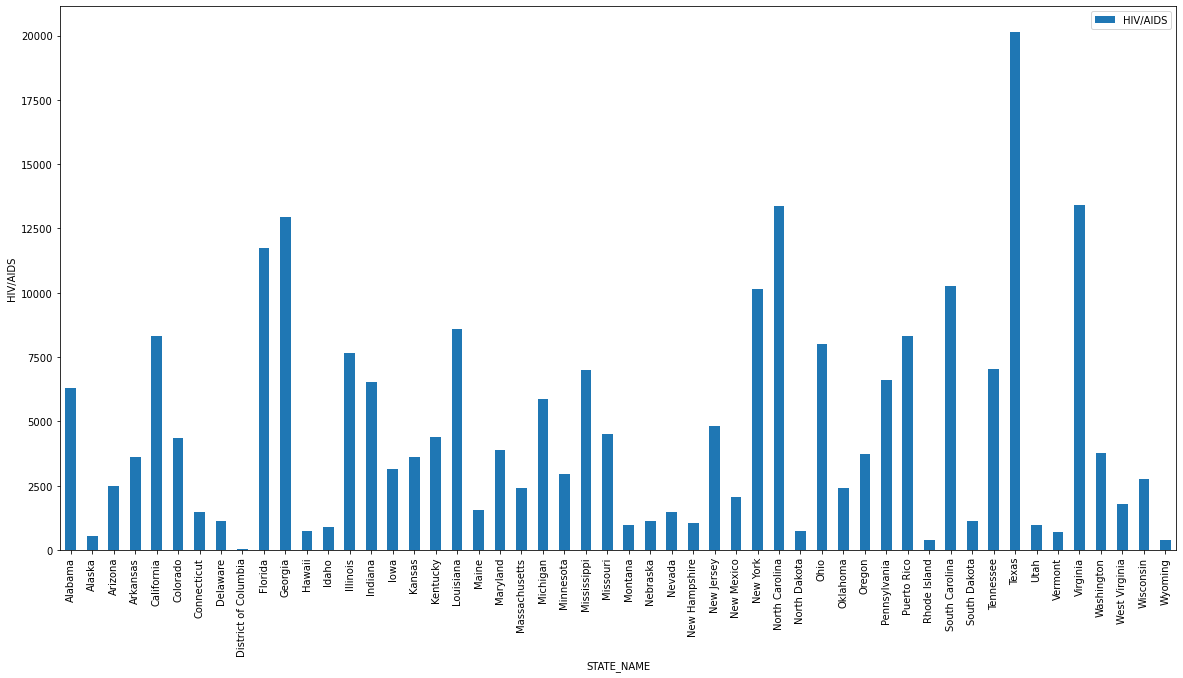

In [124]:
ax1 = r.plot(x="STATE_NAME", y=["HIV/AIDS"], kind="bar", figsize=(20,10))
ax1.set_xlabel("STATE_NAME")
ax1.set_ylabel("HIV/AIDS")

Text(0, 0.5, 'Hypertension')

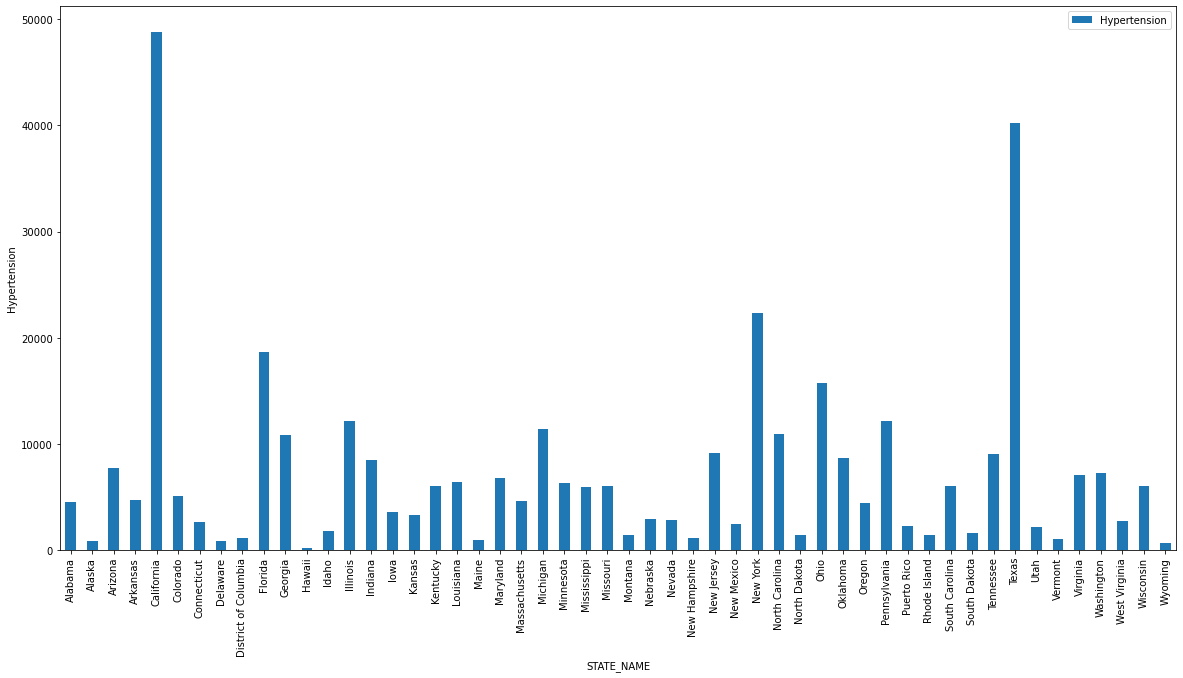

In [125]:
ax2 = r.plot(x="STATE_NAME", y=["Hypertension"], kind="bar", figsize=(20,10))
ax2.set_xlabel("STATE_NAME")
ax2.set_ylabel("Hypertension")

Text(0, 0.5, 'Diabetes')

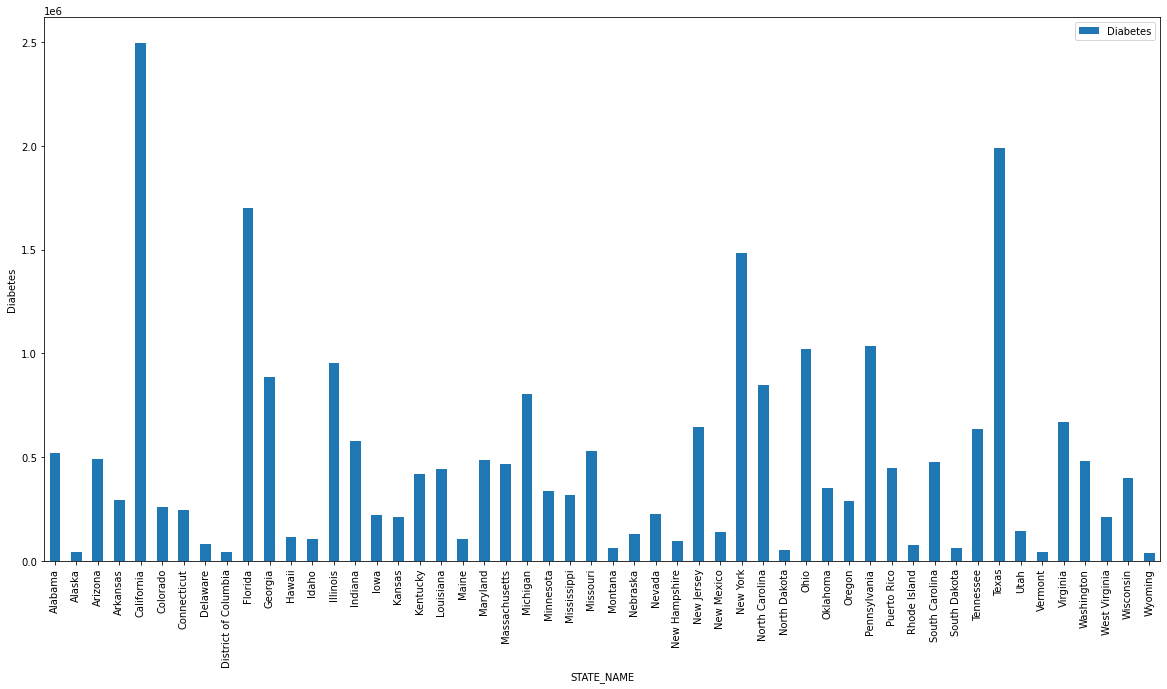

In [126]:
ax3 = r.plot(x="STATE_NAME", y=["Diabetes"], kind="bar", figsize=(20,10))
ax3.set_xlabel("STATE_NAME")
ax3.set_ylabel("Diabetes")

### Almost all the plots indicate that Texas is more prone to all the above diseases. Let's explore more on Texas.

In [127]:
pharmacy_data.head()

,State,Pharmacy Name,Street Address 1 (physical store address),Street Address 2,City,Zip,Borough,County,Notes,Registration #,Unnamed: 9,Key:,COUNTRY_NAME,Unnamed: 7,County (CODE)
1,Alaska,CARRS PHARMACY #1802,"1340 Gambell St, Anchorage",NaN,ANCHORAGE,99501,Anchorage Borough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,DEPARTMENT OF CORRECTIONS PHARMACY,"550 W 7TH AVE., ST 1260",NaN,ANCHORAGE,99501,Anchorage Borough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alaska,CARRS PHARMACY #1812,"4000 W Dimond Blvd,",NaN,ANCHORAGE,99502,Anchorage Borough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alaska,ST ELIAS SPECIALTY HOSPITAL,4800 CORDOVA,NaN,ANCHORAGE,99503,Anchorage Borough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Alaska,ANCHORAGE NBHD HEALTH CENTER PHARMACY,4951 BUSINESS PARK BLVD,NaN,ANCHORAGE,99503,Anchorage Borough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
pharmacy_data.shape

(49965, 15)

In [129]:
texas_pharmacy = pharmacy_data[pharmacy_data["State"]=="Texas"]
texas_pharmacy

,State,Pharmacy Name,Street Address 1 (physical store address),Street Address 2,City,Zip,Borough,County,Notes,Registration #,Unnamed: 9,Key:,COUNTRY_NAME,Unnamed: 7,County (CODE)
40677,Texas,"MUNIZ RIO GRANDE PHARMACY, LLC",1117 S COMMERCE STREET,NaN,HARLINGEN,78550-7706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAMERON
40678,Texas,WALMART PHARMACY 10-1118,12300 LAKE JUNE RD.,NaN,BALCH SPRINGS,75180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DALLAS
40679,Texas,AKO PHARMACY,11811 FALBROOK DR STE B1,NaN,HOUSTON,77065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HARRIS
40680,Texas,UNIVERSITY HEALTH SYSTEM - SW FAMILY HEA,2121 SW 36TH ST,NaN,SAN ANTONIO,78237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BEXAR
40681,Texas,"HILLTOP PHARMACY, INC.",631 LAKEVIEW BLVD,NaN,NEW BRAUNFELS,78130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46052,Texas,GARCIA'S PHARMACY,101 S STUART PLACE RD STE F,NaN,HARLINGEN,78550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAMERON
46053,Texas,ALLIANCE PHARMACY PLANO,4152 W SPRING CREEK PKWY STE 160,NaN,PLANO,75024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COLLIN
46054,Texas,MEDS4LESS PHARMACY,4227 AVE H STE C,NaN,ROSENBERG,77471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FORT BEND
46055,Texas,SELECT MEDS PHARMACY,8449 WEST BELLFORT AVE,STE 222,HOUSTON,77071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HARRIS


### Handling Nulls in Texas Pharmacy data

In [130]:
texas_pharmacy[texas_pharmacy.columns[texas_pharmacy.isnull().any()]].isnull().sum()

Pharmacy Name                                   1
Street Address 1 (physical store address)       1
Street Address 2                             5218
City                                            1
Zip                                             1
Borough                                      5380
County                                       5380
Notes                                        5380
Registration #                               5380
Unnamed: 9                                   5380
Key:                                         5380
COUNTRY_NAME                                 5380
Unnamed: 7                                   5380
County (CODE)                                   1
dtype: int64

### Out of a 5380 rows dataset of Texas Pharmacies, the following coloumns all have nulls. So we can prune them from our dataset.

In [131]:
texas_pharmacy[texas_pharmacy['County (CODE)'].isnull()]

,State,Pharmacy Name,Street Address 1 (physical store address),Street Address 2,City,Zip,Borough,County,Notes,Registration #,Unnamed: 9,Key:,COUNTRY_NAME,Unnamed: 7,County (CODE)
46056,Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### From the above we can see that the the above row can be removed as it doesn't hold any information. Also We shall remove the Street Address 2 column as majority of its values are nulls.

In [132]:
texas_pharmacy.columns

Index(['State', 'Pharmacy Name', 'Street Address 1 (physical store address)',
       'Street Address 2 ', 'City', 'Zip', 'Borough', 'County', 'Notes',
       'Registration #', 'Unnamed: 9', 'Key:', 'COUNTRY_NAME', 'Unnamed: 7',
       'County (CODE)'],
      dtype='object')

In [133]:
texas_pharmacy_df = texas_pharmacy.drop(['Borough', 'County','Notes', 'Registration #', 'Unnamed: 9', 'Key:', 'COUNTRY_NAME',  'Unnamed: 7','Street Address 2 ' ], axis=1)
texas_pharmacy_df = texas_pharmacy_df.dropna()
print("Final columns of demography_df: ", texas_pharmacy_df.columns)
# texas_pharmacy_df[texas_pharmacy_df.isnull().any()]


Final columns of demography_df:  Index(['State', 'Pharmacy Name', 'Street Address 1 (physical store address)',
       'City', 'Zip', 'County (CODE)'],
      dtype='object')


In [134]:
texas_pharmacy_df[texas_pharmacy_df.columns[texas_pharmacy_df.isnull().any()]].isnull().sum()

Series([], dtype: float64)

### Hence all the nulls are removed from the data

In [135]:
tp = texas_pharmacy.groupby(by=["County (CODE)"]).count()
tp = tp.reset_index()
# tp

# tp_counts = texas_pharmacy.groupby(by=["County (CODE)"]).size().reset_index()
# tp_counts

In [136]:
occur = texas_pharmacy_df.groupby(['County (CODE)']).size()
occur

County (CODE)
ANDERSON     7
ANDREWS      3
ANGELINA    13
ARANSAS      4
ARCHER       1
            ..
WOOD         9
YOAKUM       2
YOUNG        5
ZAPATA       2
ZAVALA       2
Length: 225, dtype: int64

In [137]:
# texas_pharmacy_df[texas_pharmacy_df['City']=='HOUSTON']['County (CODE)'].value_counts()

In [138]:
# texas_pharmacy_df[texas_pharmacy_df['City']=='DALLAS']['County (CODE)'].value_counts()

In [139]:
# texas_pharmacy_df[texas_pharmacy_df['City']=='AUSTIN']['County (CODE)'].value_counts()

In [140]:
# texas_pharmacy_df.groupby(by=["City"]).size()

In [141]:
texas_demo = demography_df[demography_df['STATE_NAME']=='Texas']
texas_demo

,OBJECTID,NAME,STATE_NAME,Prevalence of obesity,Hypertension,Diabetes,CVD,HIV/AIDS,STATE_FIPS,CNTY_FIPS,...,Shape__Area,Shape__Length,State,IECC Climate Zone,IECC Moisture Regime,BA Climate Zone,County Name,Temp,cvd_100k,hypertension_100k
2599,100,Rockwall,Texas,16294,98,9615,171.111300,89,48,397,...,0.037116,0.793584,TX,3,A,Hot-Humid,Rockwall,148.694208,201.0,115.7
2600,113,Somervell,Texas,1872,12,499,16.196349,5,48,425,...,0.047593,0.919264,TX,3,A,Hot-Humid,Somervell,192.083542,180.3,138.0
2601,276,Rains,Texas,2728,14,2328,34.061262,13,48,379,...,0.064582,1.332425,TX,3,A,Hot-Humid,Rains,258.809674,305.4,129.3
2602,317,Gregg,Texas,26741,189,9217,346.732408,456,48,183,...,0.068684,1.373374,TX,3,A,Hot-Humid,Gregg,276.428754,278.8,152.5
2603,323,Camp,Texas,2523,25,1448,35.998892,22,48,63,...,0.050752,1.380945,TX,3,A,Hot-Humid,Camp,203.155490,287.6,205.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848,3131,Matagorda,Texas,10066,37,2623,99.045670,71,48,321,...,0.273133,7.965322,TX,2,A,Hot-Humid,Matagorda,1140.332862,270.1,103.2
2849,3153,Nueces,Texas,85319,674,34276,770.524184,612,48,355,...,0.200071,8.913485,TX,2,A,Hot-Humid,Nueces,844.128000,222.7,195.0
2850,3157,Aransas,Texas,8106,41,3747,56.781208,34,48,7,...,0.062742,9.202430,TX,2,A,Hot-Humid,Aransas,263.740586,242.8,177.6
2851,3161,Calhoun,Texas,4868,26,2138,52.009256,16,48,57,...,0.130026,9.357858,TX,2,A,Hot-Humid,Calhoun,544.774106,239.2,121.7


In [142]:
tp

,County (CODE),State,Pharmacy Name,Street Address 1 (physical store address),Street Address 2,City,Zip,Borough,County,Notes,Registration #,Unnamed: 9,Key:,COUNTRY_NAME,Unnamed: 7
0,ANDERSON,7,7,7,1,7,7,0,0,0,0,0,0,0,0
1,ANDREWS,3,3,3,0,3,3,0,0,0,0,0,0,0,0
2,ANGELINA,13,13,13,1,13,13,0,0,0,0,0,0,0,0
3,ARANSAS,4,4,4,0,4,4,0,0,0,0,0,0,0,0
4,ARCHER,1,1,1,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,WOOD,9,9,9,1,9,9,0,0,0,0,0,0,0,0
221,YOAKUM,2,2,2,0,2,2,0,0,0,0,0,0,0,0
222,YOUNG,5,5,5,0,5,5,0,0,0,0,0,0,0,0
223,ZAPATA,2,2,2,0,2,2,0,0,0,0,0,0,0,0


## Checking whether each county has a pharmacy in Texas

In [143]:
demo_texas_county = texas_demo['County Name'].unique().tolist()
# texas_county_demo

In [144]:
pharmacy_county_texas = tp['County (CODE)'].unique().tolist()

In [145]:
len(demo_texas_county)>len(pharmacy_county_texas)

True

In [146]:
demo_texas_county = list(set(map(lambda x: x.lower().strip(), demo_texas_county)))
demo_texas_county.sort()
# demo_texas_county

In [147]:
pharmacy_county_texas = list(set(map(lambda x: x.lower().strip(), pharmacy_county_texas)))
pharmacy_county_texas.sort()
# pharmacy_county_texas

In [148]:
def Diff(li1, li2):
    res = []
    for e in li1:
        if e not in li2:
            res.append(e) 
    return res

main_list = list(set(demo_texas_county) - set(pharmacy_county_texas))
# unaccounted_counties_dallas = Diff(demo_texas_county, pharmacy_county_texas)
# len(main_list)

In [149]:
main_list

['kenedy',
 'kent',
 'hartley',
 'hudspeth',
 'king',
 'culberson',
 'delta',
 'loving',
 'edwards',
 'sterling',
 'coke',
 'motley',
 'real',
 'dewitt',
 'terrell',
 'mcmullen',
 'mclennan',
 'menard',
 'mcculloch',
 'throckmorton',
 'irion',
 'roberts',
 'glasscock',
 'cochran',
 'briscoe',
 'cottle',
 'oldham',
 'borden',
 'jeff davis',
 'lipscomb',
 'schleicher',
 'crosby']

### Let's have a closer at Counties with no pharmacy

In [150]:
'jeff davis' in demo_texas_county 
# df = df[df['Code'].str.startswith('pl')]

t = demography_df[demography_df['STATE_NAME']=='Texas']
t['County Name'] = t['County Name'].str.lower()
t
# t[t['County Name']=='jeff davis']
ignored_counties_demo = t.loc[t['County Name'].isin(main_list)]
ignored_counties_demo

/var/folders/hr/p97d87y17g795hx2nv731n000000gn/T/ipykernel_14235/2101475402.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['County Name'] = t['County Name'].str.lower()


,OBJECTID,NAME,STATE_NAME,Prevalence of obesity,Hypertension,Diabetes,CVD,HIV/AIDS,STATE_FIPS,CNTY_FIPS,...,Shape__Area,Shape__Length,State,IECC Climate Zone,IECC Moisture Regime,BA Climate Zone,County Name,Temp,cvd_100k,hypertension_100k
2610,1104,Cochran,Texas,514,29,340,6.817140,19,48,79,...,0.195074,1.767774,TX,4,B,Mixed-Dry,cochran,775.337337,217.8,-99.0
2619,1279,Real,Texas,708,3,276,8.131860,19,48,385,...,0.169253,1.860553,TX,2,B,Hot-Humid,real,700.109366,244.2,98.3
2621,1327,Glasscock,Texas,232,29,105,-99.000000,19,48,173,...,0.222382,1.892961,TX,3,B,Hot-Dry,glasscock,900.914377,-99.0,-99.0
2630,1363,Kent,Texas,152,29,41,-99.000000,19,48,263,...,0.226086,1.904460,TX,3,B,Hot-Dry,kent,902.895070,-99.0,-99.0
2635,1380,Borden,Texas,135,29,82,-99.000000,6,48,33,...,0.225774,1.909160,TX,3,B,Hot-Dry,borden,906.043349,-99.0,-99.0
2637,1386,Crosby,Texas,1181,9,201,17.478963,7,48,107,...,0.226890,1.912830,TX,3,B,Hot-Dry,crosby,901.684046,290.3,158.6
2647,1410,Throckmorton,Texas,302,29,77,4.926834,0,48,447,...,0.229231,1.921927,TX,3,B,Hot-Dry,throckmorton,915.495495,300.6,-99.0
2649,1417,Briscoe,Texas,301,29,118,-99.000000,19,48,45,...,0.229286,1.923371,TX,4,B,Mixed-Dry,briscoe,901.588195,-99.0,-99.0
2654,1429,King,Texas,46,29,23,-99.000000,0,48,269,...,0.229830,1.928117,TX,3,B,Hot-Dry,king,913.350047,-99.0,-99.0
2668,1464,Sterling,Texas,233,29,100,-99.000000,0,48,431,...,0.227844,1.947194,TX,3,B,Hot-Dry,sterling,923.450540,-99.0,-99.0


Text(0, 0.5, 'Hypertension')

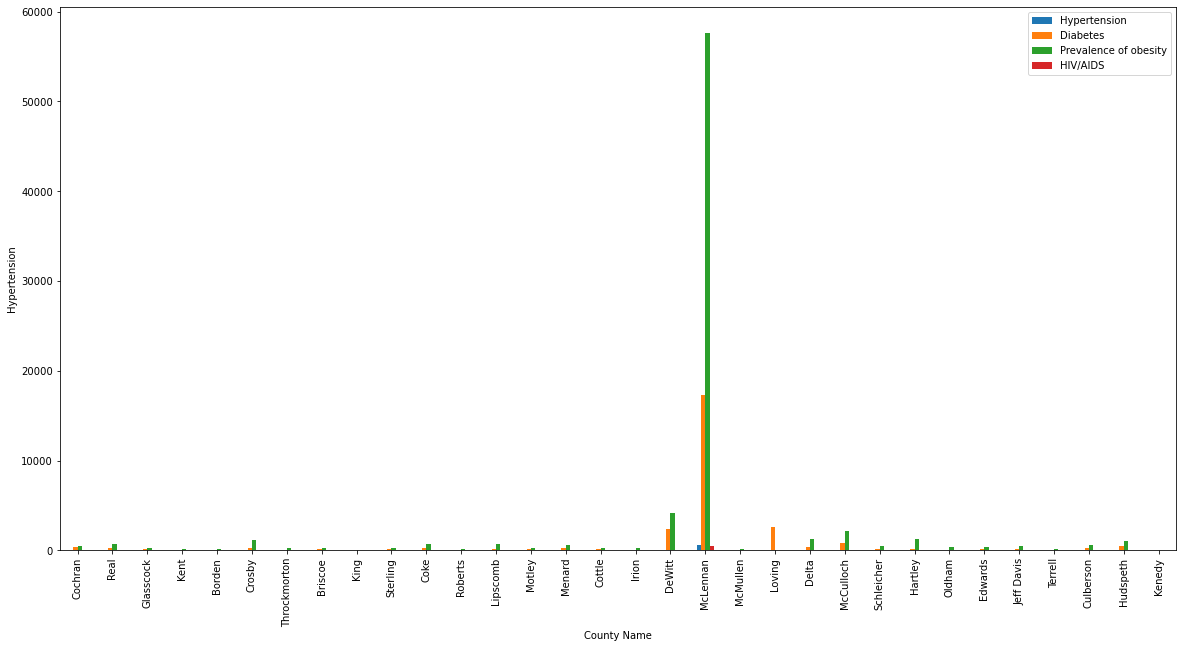

In [151]:
ignored_counties_demo
ax5 = ignored_counties_demo.plot(x="NAME", y=["Hypertension", "Diabetes", "Prevalence of obesity", "HIV/AIDS"], kind="bar", figsize=(20,10))
ax5.set_xlabel("County Name")
ax5.set_ylabel("Hypertension")

In [152]:
ignored_counties_demo[['NAME', 'HOUSEHOLDS', 'HSE_UNITS', 'FAMILIES','ASIAN', "HISPANIC", "MULT_RACE"]]

,NAME,HOUSEHOLDS,HSE_UNITS,FAMILIES,ASIAN,HISPANIC,MULT_RACE
2610,Cochran,1113,1360,814,5,1654,84
2619,Real,1374,2599,977,2,814,65
2621,Glasscock,441,580,345,1,378,15
2630,Kent,350,552,209,0,120,11
2635,Borden,264,385,190,1,95,10
2637,Crosby,2237,2902,1613,6,3171,123
2647,Throckmorton,721,1079,475,7,152,13
2649,Briscoe,692,953,483,0,411,40
2654,King,113,186,88,0,39,4
2668,Sterling,440,615,328,0,365,22


In [153]:
# HOUSEHOLDS, HSE_UNITS, FAMILIES
# ignored_counties_demo.columns

In [154]:
# ignored_counties_demo[['NAME', 'HOUSEHOLDS', 'HSE_UNITS', 'FAMILIES','ASIAN', "HISPANIC"]]

In [155]:
all_groups = ['MALES', 'FEMALES']
ignored_counties_demo['TOTAL_POP'] = ignored_counties_demo['MALES'] + ignored_counties_demo['FEMALES']
ignored_counties_demo

/var/folders/hr/p97d87y17g795hx2nv731n000000gn/T/ipykernel_14235/2895656659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ignored_counties_demo['TOTAL_POP'] = ignored_counties_demo['MALES'] + ignored_counties_demo['FEMALES']


,OBJECTID,NAME,STATE_NAME,Prevalence of obesity,Hypertension,Diabetes,CVD,HIV/AIDS,STATE_FIPS,CNTY_FIPS,...,Shape__Length,State,IECC Climate Zone,IECC Moisture Regime,BA Climate Zone,County Name,Temp,cvd_100k,hypertension_100k,TOTAL_POP
2610,1104,Cochran,Texas,514,29,340,6.817140,19,48,79,...,1.767774,TX,4,B,Mixed-Dry,cochran,775.337337,217.8,-99.0,3127
2619,1279,Real,Texas,708,3,276,8.131860,19,48,385,...,1.860553,TX,2,B,Hot-Humid,real,700.109366,244.2,98.3,3309
2621,1327,Glasscock,Texas,232,29,105,-99.000000,19,48,173,...,1.892961,TX,3,B,Hot-Dry,glasscock,900.914377,-99.0,-99.0,1226
2630,1363,Kent,Texas,152,29,41,-99.000000,19,48,263,...,1.904460,TX,3,B,Hot-Dry,kent,902.895070,-99.0,-99.0,808
2635,1380,Borden,Texas,135,29,82,-99.000000,6,48,33,...,1.909160,TX,3,B,Hot-Dry,borden,906.043349,-99.0,-99.0,641
2637,1386,Crosby,Texas,1181,9,201,17.478963,7,48,107,...,1.912830,TX,3,B,Hot-Dry,crosby,901.684046,290.3,158.6,6059
2647,1410,Throckmorton,Texas,302,29,77,4.926834,0,48,447,...,1.921927,TX,3,B,Hot-Dry,throckmorton,915.495495,300.6,-99.0,1641
2649,1417,Briscoe,Texas,301,29,118,-99.000000,19,48,45,...,1.923371,TX,4,B,Mixed-Dry,briscoe,901.588195,-99.0,-99.0,1637
2654,1429,King,Texas,46,29,23,-99.000000,0,48,269,...,1.928117,TX,3,B,Hot-Dry,king,913.350047,-99.0,-99.0,286
2668,1464,Sterling,Texas,233,29,100,-99.000000,0,48,431,...,1.947194,TX,3,B,Hot-Dry,sterling,923.450540,-99.0,-99.0,1143


In [156]:
ignored_counties_demo[['NAME', 'HOUSEHOLDS', 'HSE_UNITS', 'FAMILIES','AVE_FAM_SZ','ASIAN', "HISPANIC", "MULT_RACE", 'TOTAL_POP']]

,NAME,HOUSEHOLDS,HSE_UNITS,FAMILIES,AVE_FAM_SZ,ASIAN,HISPANIC,MULT_RACE,TOTAL_POP
2610,Cochran,1113,1360,814,3.25,5,1654,84,3127
2619,Real,1374,2599,977,2.75,2,814,65,3309
2621,Glasscock,441,580,345,3.19,1,378,15,1226
2630,Kent,350,552,209,2.82,0,120,11,808
2635,Borden,264,385,190,2.89,1,95,10,641
2637,Crosby,2237,2902,1613,3.20,6,3171,123,6059
2647,Throckmorton,721,1079,475,2.83,7,152,13,1641
2649,Briscoe,692,953,483,2.87,0,411,40,1637
2654,King,113,186,88,2.89,0,39,4,286
2668,Sterling,440,615,328,2.97,0,365,22,1143


Text(0, 0.5, 'Hypertension')

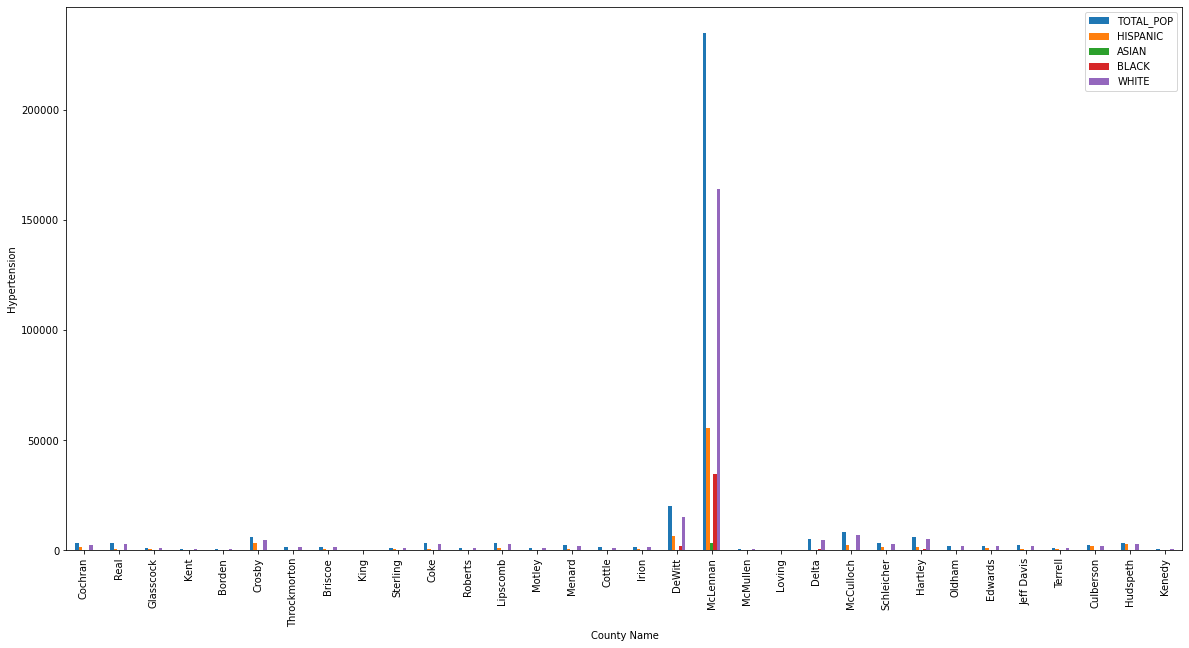

In [157]:
# ignored_counties_demo_no_McL = ignored_counties_demo.loc[:, ignored_counties_demo.columns != '']
ax6 = ignored_counties_demo.plot(x="NAME", y=["TOTAL_POP", "HISPANIC", "ASIAN","BLACK","WHITE" ], kind="bar", figsize=(20,10))
ax6.set_xlabel("County Name")
ax6.set_ylabel("Hypertension")

### Dropping the Mclennan county so that the plots are not heavily skewed in it's favour and we can also have a better understanding of the other counties

In [158]:
ignored_counties_demo_noMcL = ignored_counties_demo[~ignored_counties_demo['NAME'].isin(['McLennan'])]
ignored_counties_demo_noMcL

,OBJECTID,NAME,STATE_NAME,Prevalence of obesity,Hypertension,Diabetes,CVD,HIV/AIDS,STATE_FIPS,CNTY_FIPS,...,Shape__Length,State,IECC Climate Zone,IECC Moisture Regime,BA Climate Zone,County Name,Temp,cvd_100k,hypertension_100k,TOTAL_POP
2610,1104,Cochran,Texas,514,29,340,6.817140,19,48,79,...,1.767774,TX,4,B,Mixed-Dry,cochran,775.337337,217.8,-99.0,3127
2619,1279,Real,Texas,708,3,276,8.131860,19,48,385,...,1.860553,TX,2,B,Hot-Humid,real,700.109366,244.2,98.3,3309
2621,1327,Glasscock,Texas,232,29,105,-99.000000,19,48,173,...,1.892961,TX,3,B,Hot-Dry,glasscock,900.914377,-99.0,-99.0,1226
2630,1363,Kent,Texas,152,29,41,-99.000000,19,48,263,...,1.904460,TX,3,B,Hot-Dry,kent,902.895070,-99.0,-99.0,808
2635,1380,Borden,Texas,135,29,82,-99.000000,6,48,33,...,1.909160,TX,3,B,Hot-Dry,borden,906.043349,-99.0,-99.0,641
2637,1386,Crosby,Texas,1181,9,201,17.478963,7,48,107,...,1.912830,TX,3,B,Hot-Dry,crosby,901.684046,290.3,158.6,6059
2647,1410,Throckmorton,Texas,302,29,77,4.926834,0,48,447,...,1.921927,TX,3,B,Hot-Dry,throckmorton,915.495495,300.6,-99.0,1641
2649,1417,Briscoe,Texas,301,29,118,-99.000000,19,48,45,...,1.923371,TX,4,B,Mixed-Dry,briscoe,901.588195,-99.0,-99.0,1637
2654,1429,King,Texas,46,29,23,-99.000000,0,48,269,...,1.928117,TX,3,B,Hot-Dry,king,913.350047,-99.0,-99.0,286
2668,1464,Sterling,Texas,233,29,100,-99.000000,0,48,431,...,1.947194,TX,3,B,Hot-Dry,sterling,923.450540,-99.0,-99.0,1143


Text(0, 0.5, 'Hypertension')

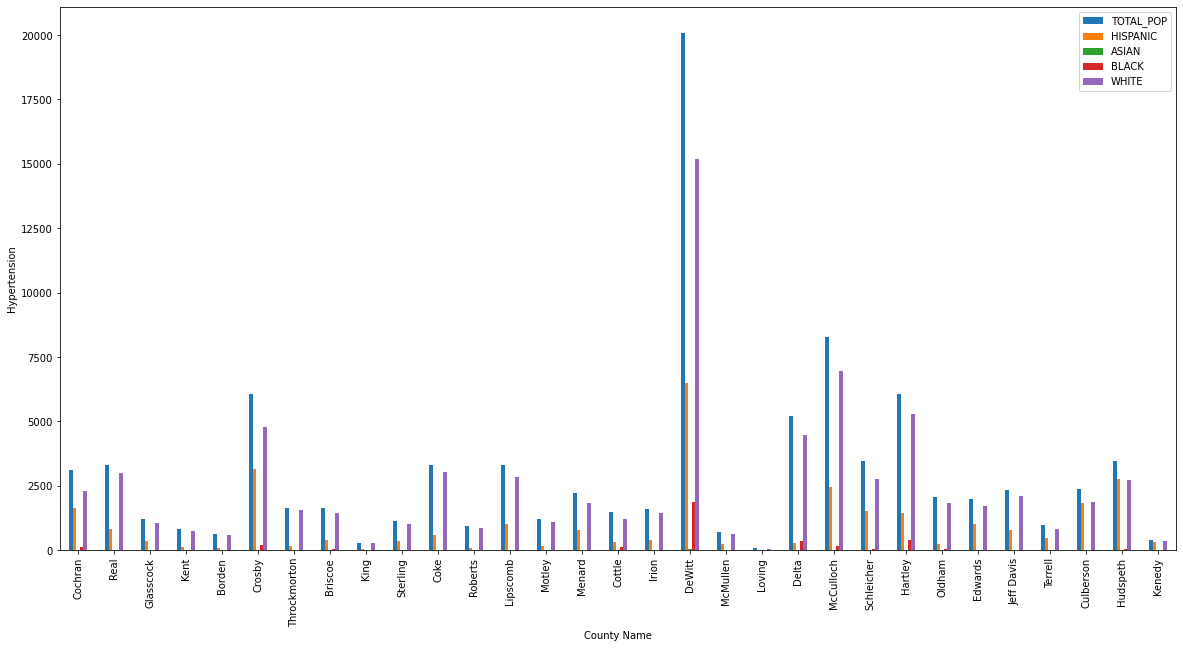

In [159]:
# ignored_counties_demo_no_McL = ignored_counties_demo.loc[:, ignored_counties_demo.columns != '']
ax7 = ignored_counties_demo_noMcL.plot(x="NAME", y=["TOTAL_POP", "HISPANIC", "ASIAN","BLACK","WHITE" ], kind="bar", figsize=(20,10))
ax7.set_xlabel("County Name")
ax7.set_ylabel("Hypertension")

Text(0, 0.5, 'Count')

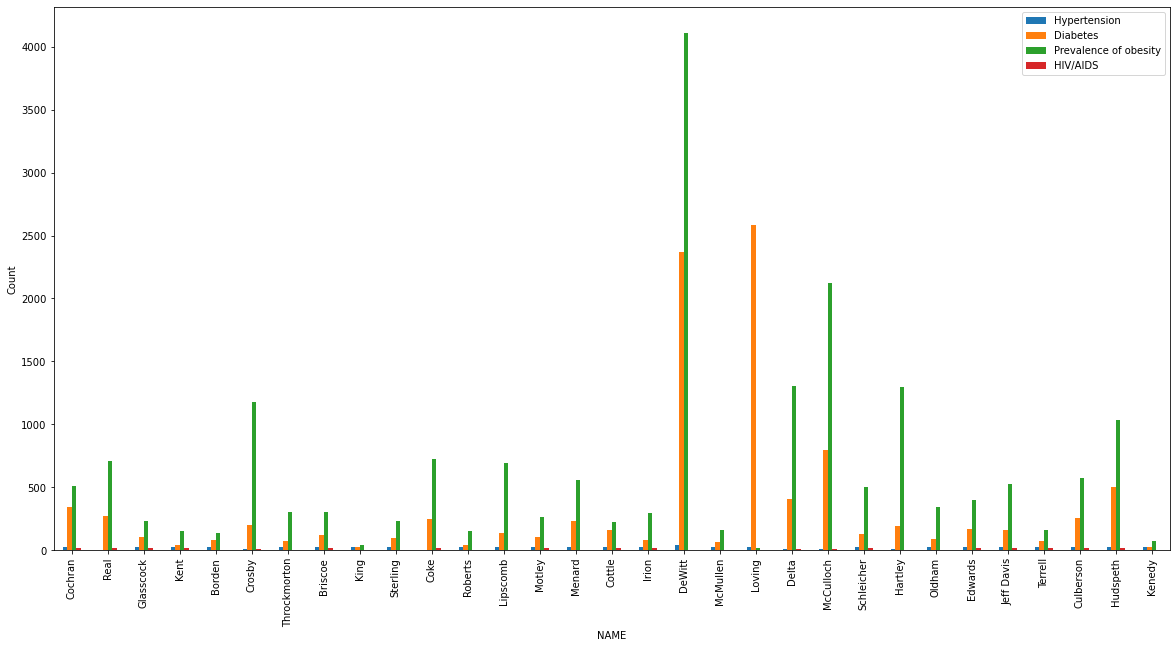

In [160]:
ignored_counties_demo
ax8 = ignored_counties_demo_noMcL.plot(x="NAME", y=["Hypertension", "Diabetes", "Prevalence of obesity", "HIV/AIDS"], kind="bar", figsize=(20,10))
ax5.set_xlabel("County Name")
ax8.set_ylabel("Count")

### Age-wise and Gender-wise analysis of the Ignored Counties

/var/folders/hr/p97d87y17g795hx2nv731n000000gn/T/ipykernel_14235/4103592849.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ignored_counties_demo_noMcL['Young'] = ignored_counties_demo_noMcL['AGE_UNDER5'] + ignored_counties_demo_noMcL['AGE_5_9'] +ignored_counties_demo_noMcL['AGE_10_14'] + ignored_counties_demo_noMcL['AGE_15_19'] + ignored_counties_demo_noMcL['AGE_20_24'] + ignored_counties_demo_noMcL['AGE_25_34']
/var/folders/hr/p97d87y17g795hx2nv731n000000gn/T/ipykernel_14235/4103592849.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

Text(0, 0.5, 'Count')

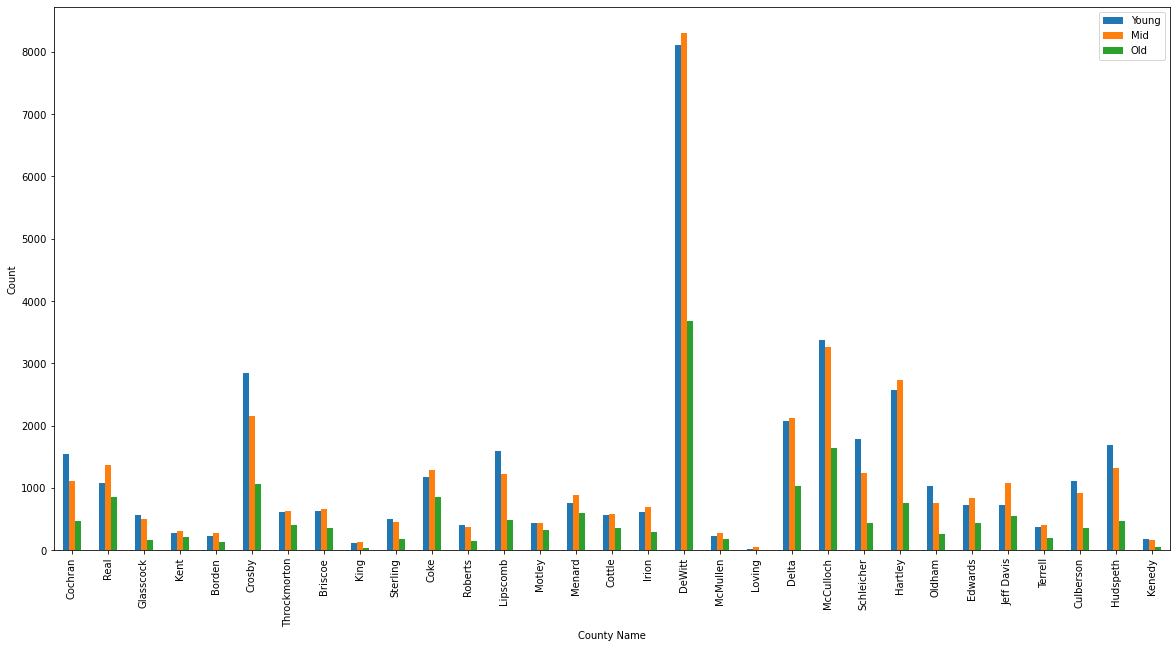

In [161]:
ages_analysis = ['AGE_UNDER5', 'AGE_5_9', 'AGE_10_14',
       'AGE_15_19', 'AGE_20_24', 'AGE_25_34', 'AGE_35_44', 'AGE_45_54',
       'AGE_55_64', 'AGE_65_74', 'AGE_75_84', 'AGE_85_UP']

ignored_counties_demo_noMcL['Young'] = ignored_counties_demo_noMcL['AGE_UNDER5'] + ignored_counties_demo_noMcL['AGE_5_9'] +ignored_counties_demo_noMcL['AGE_10_14'] + ignored_counties_demo_noMcL['AGE_15_19'] + ignored_counties_demo_noMcL['AGE_20_24'] + ignored_counties_demo_noMcL['AGE_25_34'] 

ignored_counties_demo_noMcL['Mid'] = ignored_counties_demo_noMcL['AGE_35_44'] + ignored_counties_demo_noMcL['AGE_45_54'] + ignored_counties_demo_noMcL['AGE_55_64']

ignored_counties_demo_noMcL['Old'] = ignored_counties_demo_noMcL['AGE_65_74'] + ignored_counties_demo_noMcL['AGE_75_84'] + ignored_counties_demo_noMcL['AGE_85_UP']


ax9 = ignored_counties_demo_noMcL.plot(x="NAME", y=['Young', 'Mid', 'Old'], kind="bar", figsize=(20,10))
ax9.set_xlabel("County Name")
ax9.set_ylabel("Count")

Text(0, 0.5, 'Count')

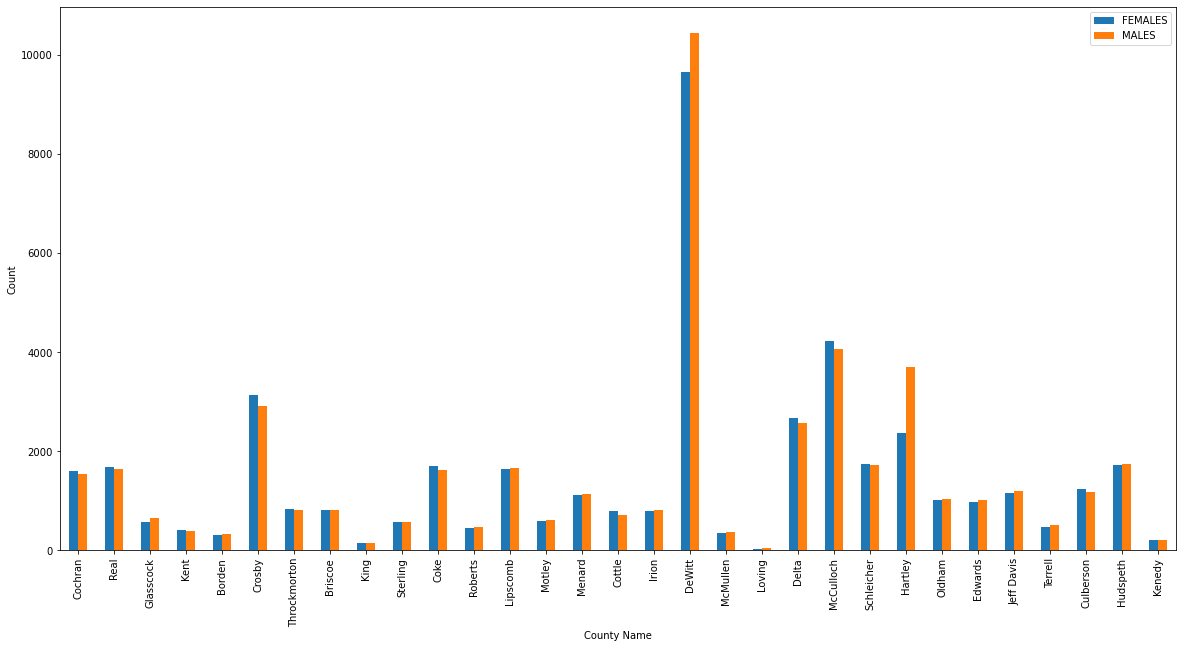

In [162]:
ax10 = ignored_counties_demo_noMcL.plot(x="NAME", y=['FEMALES', 'MALES'], kind="bar", figsize=(20,10))
ax10.set_xlabel("County Name")
ax10.set_ylabel("Count")

### Checking for correlations between columns of interest in the ignored and known counties

<AxesSubplot:>

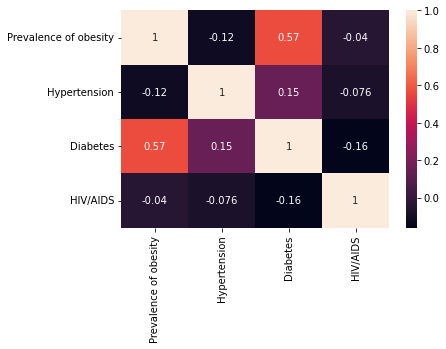

In [163]:
import seaborn as sns
x = ignored_counties_demo_noMcL[['Prevalence of obesity', 'Hypertension', 'Diabetes', 'HIV/AIDS']]
sns.heatmap(x.corr(), annot=True)

<AxesSubplot:>

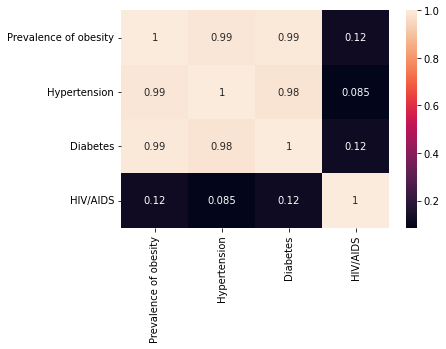

In [198]:
ignored_counties_demo['SQMI']
known_counties_demo = t.loc[~t['County Name'].isin(main_list)]
# known_counties_demo
sns.heatmap(known_counties_demo[['Prevalence of obesity', 'Hypertension', 'Diabetes', 'HIV/AIDS']].corr(), annot=True)

### Checking for correlations between columns of interest in texas and across US demography

<AxesSubplot:>

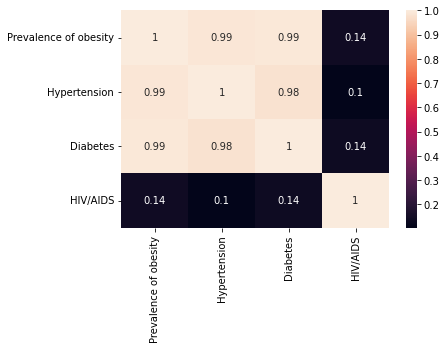

In [167]:
import seaborn as sns
x = texas_demo[['Prevalence of obesity', 'Hypertension', 'Diabetes', 'HIV/AIDS']]
sns.heatmap(x.corr(), annot=True)

<AxesSubplot:>

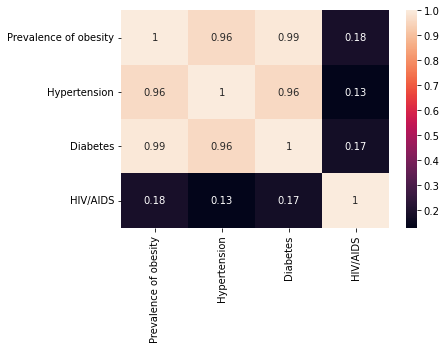

In [168]:
x = demography_df[['Prevalence of obesity', 'Hypertension', 'Diabetes', 'HIV/AIDS']]
sns.heatmap(x.corr(), annot=True)

# Statewise Data Analysis

### State wise pharmacy count

In [170]:
new_df = pharmacy_data.groupby(['State']).count()[['Pharmacy Name']].reset_index()
new_df = new_df.sort_values('Pharmacy Name').reset_index(drop=True)
new_df.rename(columns={'Pharmacy Name': 'Pharmacy_count'},inplace=True)
new_df.iloc[4:,:]

,State,Pharmacy_count
4,Alaska,128
5,Vermont,135
6,Hawaii,202
7,HAWAII,203
8,Idaho,212
9,IDAHO,281
10,North Dakota,310
11,South Dakota,320
12,Rhode island,366
13,Nebraska,454


<AxesSubplot:xlabel='State', ylabel='Pharmacy_count'>

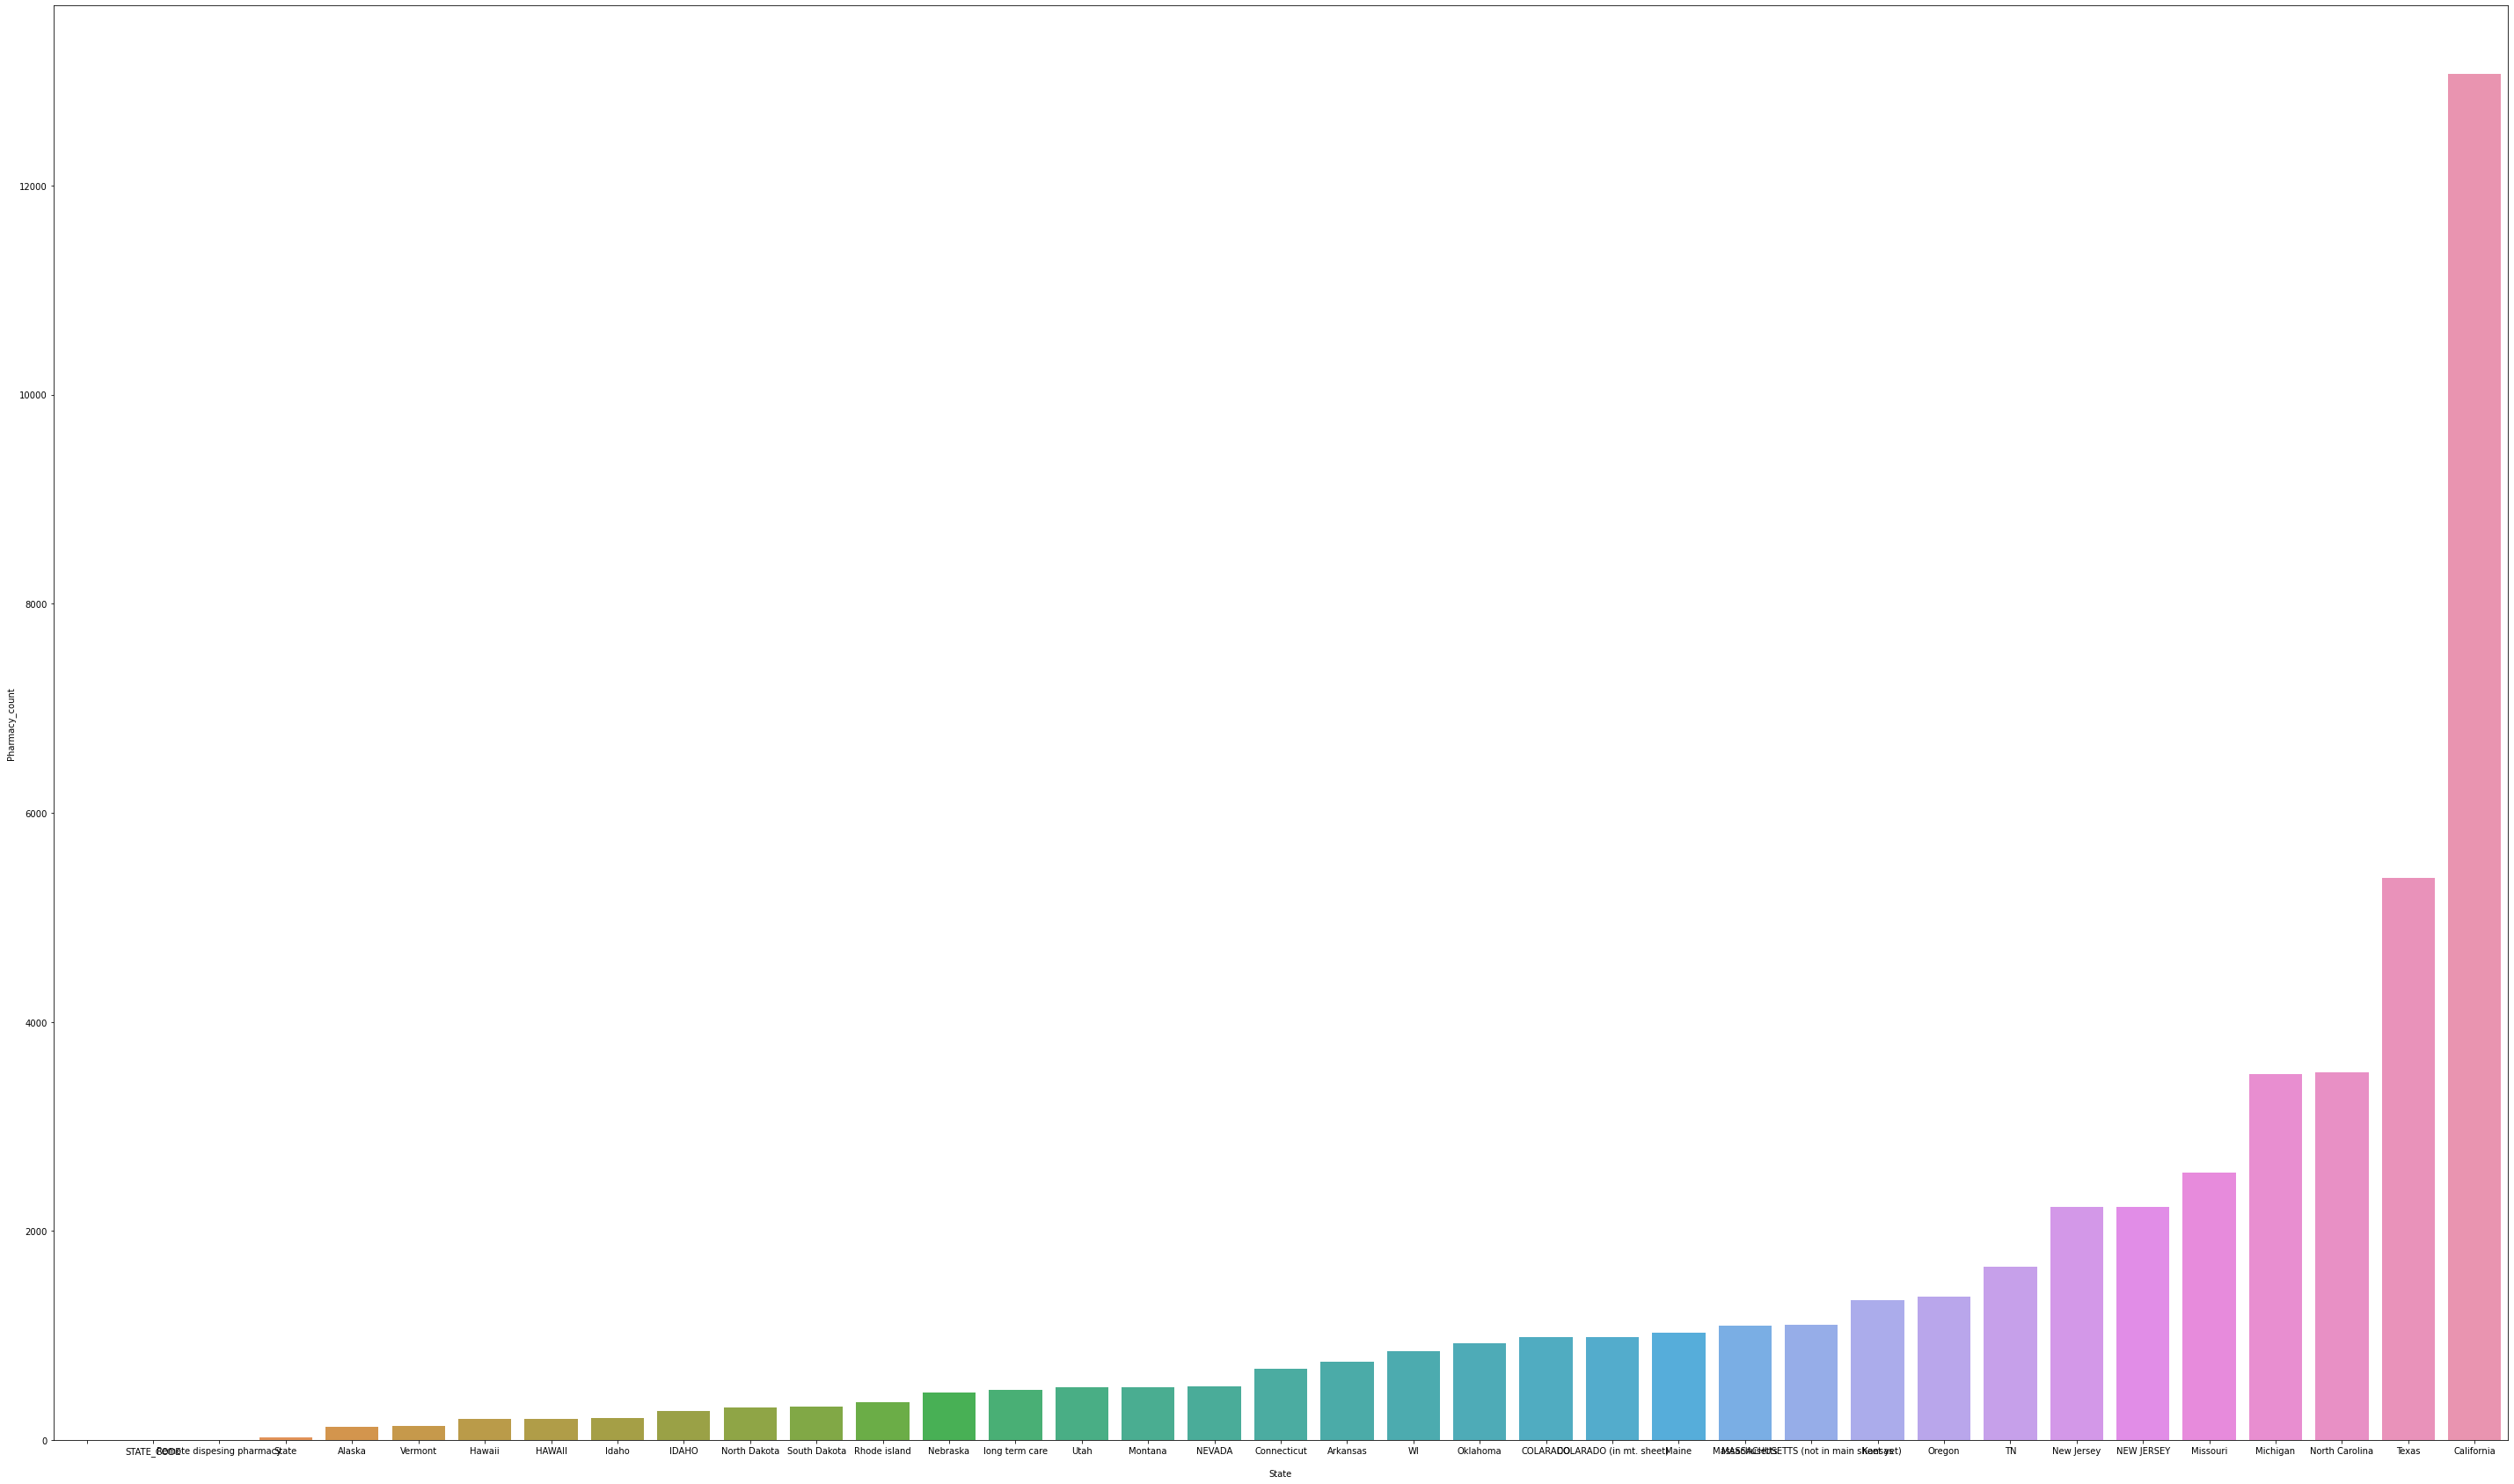

In [171]:
import matplotlib.pyplot as plt
plt.figure(figsize = (50,30))
sns.barplot(x='State', y="Pharmacy_count", data=new_df)

### State wise HIV/AIDS cases 

In [172]:
new_df1 = demography_df.groupby(['STATE_NAME']).count()[['HIV/AIDS']].reset_index().sort_values('HIV/AIDS')
new_df1.rename(columns = {'STATE_NAME':'State'},inplace=True)
new_df1.reset_index(drop=True,inplace=True)
new_df1

,State,HIV/AIDS
0,District of Columbia,1
1,Delaware,3
2,Rhode Island,5
3,Hawaii,5
4,Connecticut,8
5,New Hampshire,10
6,Massachusetts,14
7,Vermont,14
8,Arizona,15
9,Maine,16


### Checking whether there is any pattern based on the pharmacy count and HIV/AIDS cases on the state

In [173]:
result = pd.merge(new_df,new_df1,on = 'State',how='inner')
result

,State,Pharmacy_count,HIV/AIDS
0,Alaska,128,28
1,Vermont,135,14
2,Hawaii,202,5
3,Idaho,212,44
4,North Dakota,310,53
5,South Dakota,320,65
6,Nebraska,454,93
7,Utah,505,29
8,Montana,508,56
9,Connecticut,687,8


<AxesSubplot:>

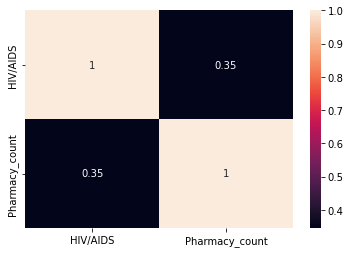

In [174]:
x = result[['HIV/AIDS','Pharmacy_count']]
sns.heatmap(x.corr(), annot=True)

In [175]:
demography_df.head()

,OBJECTID,NAME,STATE_NAME,Prevalence of obesity,Hypertension,Diabetes,CVD,HIV/AIDS,STATE_FIPS,CNTY_FIPS,...,Shape__Area,Shape__Length,State,IECC Climate Zone,IECC Moisture Regime,BA Climate Zone,County Name,Temp,cvd_100k,hypertension_100k
0,651,Randolph,Alabama,6364,13,2813,91.321650,10,1,111,...,0.146462,1.585845,AL,3,A,Mixed-Humid,Randolph,584.171953,397.5,59.5
1,791,Henry,Alabama,4779,19,2188,46.808250,34,1,67,...,0.139761,1.637258,AL,3,A,Hot-Humid,Henry,568.329522,269.4,112.2
2,808,Lamar,Alabama,3803,10,2003,49.038750,15,1,75,...,0.152635,1.640691,AL,3,A,Mixed-Humid,Lamar,605.448613,337.5,71.5
3,846,Dale,Alabama,13652,60,5806,148.505994,119,1,45,...,0.138260,1.651520,AL,3,A,Hot-Humid,Dale,562.710822,296.1,120.2
4,912,Coffee,Alabama,12938,35,6099,145.481716,64,1,31,...,0.167143,1.679895,AL,3,A,Hot-Humid,Coffee,680.472859,283.9,68.4


### Checking whether there is any pattern between minorities population and the prevalence of diseases like HIV/AIDS

In [176]:
table1 = pd.pivot_table(demography_df,index=['STATE_NAME'],values=['BLACK','ASIAN','HISPANIC','POP2013'],aggfunc=np.sum)
table1

,ASIAN,BLACK,HISPANIC,POP2013
STATE_NAME,,,,
Alabama,53595,1251311,185602,4869785
Alaska,38117,23262,39242,731398
Arizona,176695,259008,1895149,6586154
Arkansas,36102,449895,186050,2977044
California,4861007,2299072,14013719,37905036
Colorado,139028,201737,1038687,5184133
Connecticut,135565,362296,479087,3589432
Delaware,28549,191814,73221,917219
District of Columbia,21056,305125,54749,621686


In [184]:
table1['Pop%_ASIAN'] = table1.apply(lambda row: (row.ASIAN/row.POP2013)*100, axis=1)
table1.reset_index()

,STATE_NAME,ASIAN,BLACK,HISPANIC,POP2013,Pop%_HISPANIC,Pop%_BLACK,Pop%_ASIAN
0,Alabama,53595,1251311,185602,4869785,3.811298,25.695405,1.100562
1,Alaska,38117,23262,39242,731398,5.365341,3.180484,5.211526
2,Arizona,176695,259008,1895149,6586154,28.774745,3.932614,2.682825
3,Arkansas,36102,449895,186050,2977044,6.249488,15.112138,1.212679
4,California,4861007,2299072,14013719,37905036,36.970599,6.065347,12.824172
5,Colorado,139028,201737,1038687,5184133,20.035886,3.891432,2.681798
6,Connecticut,135565,362296,479087,3589432,13.347154,10.093408,3.776781
7,Delaware,28549,191814,73221,917219,7.982935,20.912563,3.112561
8,District of Columbia,21056,305125,54749,621686,8.806536,49.080243,3.386919
9,Florida,454821,2999862,4223806,19203613,21.994851,15.621342,2.368414


In [185]:
table_BLACK = table1.loc[table1['Pop%_BLACK'] > 20]

In [186]:
black_states = table_BLACK.index.to_list()
black_states

['Alabama',
 'Delaware',
 'District of Columbia',
 'Georgia',
 'Louisiana',
 'Maryland',
 'Mississippi',
 'North Carolina',
 'Puerto Rico',
 'South Carolina']

In [187]:
table_BLACK.drop(['ASIAN','HISPANIC','Pop%_ASIAN','Pop%_HISPANIC'],axis=1,inplace=True)
table_BLACK.reset_index()

/Users/vag/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,STATE_NAME,BLACK,POP2013,Pop%_BLACK
0,Alabama,1251311,4869785,25.695405
1,Delaware,191814,917219,20.912563
2,District of Columbia,305125,621686,49.080243
3,Georgia,2950435,9918426,29.747008
4,Louisiana,1452396,4643169,31.280274
5,Maryland,1700298,5858606,29.022228
6,Mississippi,1098385,3013834,36.444774
7,North Carolina,2048628,9827435,20.846009
8,Puerto Rico,-7722,-7722,100.000000
9,South Carolina,1290684,4772852,27.042196


In [188]:
table_BLACK['State'] = table_BLACK.index
table_BLACK

/var/folders/hr/p97d87y17g795hx2nv731n000000gn/T/ipykernel_14235/656710467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_BLACK['State'] = table_BLACK.index


,BLACK,POP2013,Pop%_BLACK,State
STATE_NAME,,,,
Alabama,1251311,4869785,25.695405,Alabama
Delaware,191814,917219,20.912563,Delaware
District of Columbia,305125,621686,49.080243,District of Columbia
Georgia,2950435,9918426,29.747008,Georgia
Louisiana,1452396,4643169,31.280274,Louisiana
Maryland,1700298,5858606,29.022228,Maryland
Mississippi,1098385,3013834,36.444774,Mississippi
North Carolina,2048628,9827435,20.846009,North Carolina
Puerto Rico,-7722,-7722,100.000000,Puerto Rico


In [189]:
table_new=table_BLACK.reset_index(drop=True)
table_new

,BLACK,POP2013,Pop%_BLACK,State
0,1251311,4869785,25.695405,Alabama
1,191814,917219,20.912563,Delaware
2,305125,621686,49.080243,District of Columbia
3,2950435,9918426,29.747008,Georgia
4,1452396,4643169,31.280274,Louisiana
5,1700298,5858606,29.022228,Maryland
6,1098385,3013834,36.444774,Mississippi
7,2048628,9827435,20.846009,North Carolina
8,-7722,-7722,100.000000,Puerto Rico
9,1290684,4772852,27.042196,South Carolina


In [190]:
black_stats=pd.merge(new_df1,table_new,on='State',how='inner')
black_stats

,State,HIV/AIDS,BLACK,POP2013,Pop%_BLACK
0,District of Columbia,1,305125,621686,49.080243
1,Delaware,3,191814,917219,20.912563
2,Maryland,24,1700298,5858606,29.022228
3,South Carolina,46,1290684,4772852,27.042196
4,Louisiana,64,1452396,4643169,31.280274
5,Alabama,67,1251311,4869785,25.695405
6,Puerto Rico,78,-7722,-7722,100.000000
7,Mississippi,82,1098385,3013834,36.444774
8,North Carolina,100,2048628,9827435,20.846009
9,Georgia,159,2950435,9918426,29.747008


<AxesSubplot:>

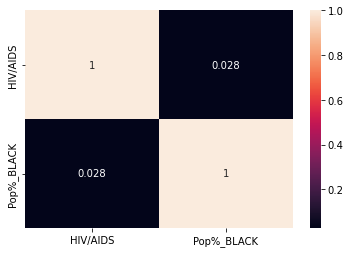

In [191]:
temp = black_stats[['HIV/AIDS','Pop%_BLACK']]
sns.heatmap(temp.corr(), annot=True)

In [192]:
table_HISPANIC = table1.loc[table1['Pop%_HISPANIC'] > 20]
table_HISPANIC

,ASIAN,BLACK,HISPANIC,POP2013,Pop%_HISPANIC,Pop%_BLACK,Pop%_ASIAN
STATE_NAME,,,,,,,
Arizona,176695,259008,1895149,6586154,28.774745,3.932614,2.682825
California,4861007,2299072,14013719,37905036,36.970599,6.065347,12.824172
Colorado,139028,201737,1038687,5184133,20.035886,3.891432,2.681798
Florida,454821,2999862,4223806,19203613,21.994851,15.621342,2.368414
Nevada,195436,218626,716501,2788123,25.698328,7.841333,7.009590
New Mexico,28208,42550,953403,2104176,45.310041,2.022169,1.340572
Puerto Rico,-7722,-7722,-7722,-7722,100.000000,100.000000,100.000000
Texas,964596,2979598,9460921,26178866,36.139537,11.381692,3.684636


In [193]:
table_HISPANIC.drop(['ASIAN','BLACK','Pop%_ASIAN','Pop%_BLACK'],axis=1,inplace=True)
table_HISPANIC.reset_index()

/Users/vag/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,STATE_NAME,HISPANIC,POP2013,Pop%_HISPANIC
0,Arizona,1895149,6586154,28.774745
1,California,14013719,37905036,36.970599
2,Colorado,1038687,5184133,20.035886
3,Florida,4223806,19203613,21.994851
4,Nevada,716501,2788123,25.698328
5,New Mexico,953403,2104176,45.310041
6,Puerto Rico,-7722,-7722,100.000000
7,Texas,9460921,26178866,36.139537


In [194]:
table_HISPANIC['State'] = table_HISPANIC.index
table_HISPANIC

/var/folders/hr/p97d87y17g795hx2nv731n000000gn/T/ipykernel_14235/990444397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_HISPANIC['State'] = table_HISPANIC.index


,HISPANIC,POP2013,Pop%_HISPANIC,State
STATE_NAME,,,,
Arizona,1895149,6586154,28.774745,Arizona
California,14013719,37905036,36.970599,California
Colorado,1038687,5184133,20.035886,Colorado
Florida,4223806,19203613,21.994851,Florida
Nevada,716501,2788123,25.698328,Nevada
New Mexico,953403,2104176,45.310041,New Mexico
Puerto Rico,-7722,-7722,100.000000,Puerto Rico
Texas,9460921,26178866,36.139537,Texas


In [195]:
table_new1=table_HISPANIC.reset_index(drop=True)
table_new1

,HISPANIC,POP2013,Pop%_HISPANIC,State
0,1895149,6586154,28.774745,Arizona
1,14013719,37905036,36.970599,California
2,1038687,5184133,20.035886,Colorado
3,4223806,19203613,21.994851,Florida
4,716501,2788123,25.698328,Nevada
5,953403,2104176,45.310041,New Mexico
6,-7722,-7722,100.000000,Puerto Rico
7,9460921,26178866,36.139537,Texas


In [196]:
hispanic_stats=pd.merge(new_df1,table_new1,on='State',how='inner')
hispanic_stats

,State,HIV/AIDS,HISPANIC,POP2013,Pop%_HISPANIC
0,Arizona,15,1895149,6586154,28.774745
1,Nevada,17,716501,2788123,25.698328
2,New Mexico,33,953403,2104176,45.310041
3,California,58,14013719,37905036,36.970599
4,Colorado,64,1038687,5184133,20.035886
5,Florida,67,4223806,19203613,21.994851
6,Puerto Rico,78,-7722,-7722,100.000000
7,Texas,254,9460921,26178866,36.139537


<AxesSubplot:>

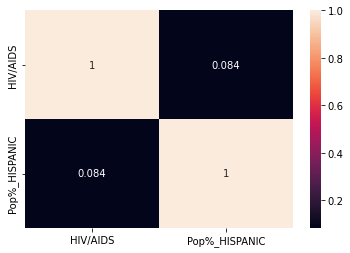

In [197]:
temp1 = hispanic_stats[['HIV/AIDS','Pop%_HISPANIC']]
sns.heatmap(temp1.corr(), annot=True)